# Sameh218767 and Merihan226392 Work

Table of Contents:
- Imports
- Load Data
- Overview of The Dataset
- Data Exploration
- General Data Visualization
- Data Cleaning ( Null and Outlier Handling )
- Feature Engineering
-  Feature Selection ( Corr matrix, SFS, SBS)
- Model Training and Evaluation ( Random Forest, Linear Regression, LGMBoost)
- Comparison

# Imports

In [1]:
# Math and Data Handling
import numpy as np
import pandas as pd
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Data Cleaning
from sklearn.impute import SimpleImputer

# Training, Feature Selection, and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.feature_selection import SelectKBest, f_regression, SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import lightgbm as lgb


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Load Data

In [2]:
# Load the dataset into a DataFrame
df = pd.read_csv('../dataset/air_temprature_dataset.csv')

# Overview of The Dataset

**About Dataset:**
This dataset focuses on predicting next-day maximum and minimum air temperatures using data from the LDAPS (Local Data Assimilation and Prediction System) model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. The primary objective is to improve bias correction in temperature predictions by utilizing historical weather data alongside model forecasts. This is crucial for applications in agriculture, energy management, and public safety, where accurate temperature predictions can significantly impact decision-making. Hindcast validation was conducted for the period from 2015 to 2017.

---

**Source:** https://www.kaggle.com/datasets/smokingkrils/temperature-forecast-project-using-ml


- **station**: Weather station number (1 to 25).
- **Date**: Present day in yyyy-mm-dd format ('2013-06-30' to '2017-08-30').
- **Present_Tmax**: Maximum air temperature between 0 and 21 h on the present day (°C), ranging from 20 to 37.6.
- **Present_Tmin**: Minimum air temperature between 0 and 21 h on the present day (°C), ranging from 11.3 to 29.9.
- **LDAPS_RHmin**: LDAPS model forecast of next-day minimum relative humidity (%), ranging from 19.8 to 98.5.
- **LDAPS_RHmax**: LDAPS model forecast of next-day maximum relative humidity (%), ranging from 58.9 to 100.
- **LDAPS_Tmax_lapse**: LDAPS model forecast of next-day maximum air temperature with applied lapse rate (°C), ranging from 17.6 to 38.5.
- **LDAPS_Tmin_lapse**: LDAPS model forecast of next-day minimum air temperature with applied lapse rate (°C), ranging from 14.3 to 29.6.
- **LDAPS_WS**: LDAPS model forecast of next-day average wind speed (m/s), ranging from 2.9 to 21.9.
- **LDAPS_LH**: LDAPS model forecast of next-day average latent heat flux (W/m²), ranging from -13.6 to 213.4.
- **LDAPS_CC1**: LDAPS model forecast of next-day average cloud cover for the 1st 6-hour period (0-5 h) (%), ranging from 0 to 0.97.
- **LDAPS_CC2**: LDAPS model forecast of next-day average cloud cover for the 2nd 6-hour period (6-11 h) (%), ranging from 0 to 0.97.
- **LDAPS_CC3**: LDAPS model forecast of next-day average cloud cover for the 3rd 6-hour period (12-17 h) (%), ranging from 0 to 0.98.
- **LDAPS_CC4**: LDAPS model forecast of next-day average cloud cover for the 4th 6-hour period (18-23 h) (%), ranging from 0 to 0.97.
- **LDAPS_PPT1**: LDAPS model forecast of next-day precipitation for the 1st 6-hour period (0-5 h) (%), ranging from 0 to 23.7.
- **LDAPS_PPT2**: LDAPS model forecast of next-day precipitation for the 2nd 6-hour period (6-11 h) (%), ranging from 0 to 21.6.
- **LDAPS_PPT3**: LDAPS model forecast of next-day precipitation for the 3rd 6-hour period (12-17 h) (%), ranging from 0 to 15.8.
- **LDAPS_PPT4**: LDAPS model forecast of next-day precipitation for the 4th 6-hour period (18-23 h) (%), ranging from 0 to 16.7.
- **lat**: Latitude (°), ranging from 37.456 to 37.645.
- **lon**: Longitude (°), ranging from 126.826 to 127.135.
- **DEM**: Elevation (m), ranging from 12.4 to 212.3.
- **Slope**: Slope (°), ranging from 0.1 to 5.2.
- **Solar radiation**: Daily incoming solar radiation (Wh/m²), ranging from 4329.5 to 5992.9.

### Target Variables:
1. **Next_Tmax**: Forecast of the next-day maximum air temperature (°C), ranging from 17.4 to 38.9.
2. **Next_Tmin**: Forecast of the next-day minimum air temperature (°C), ranging from 11.3 to 29.8.


# Data Exploration

In [3]:
print("Seeing the first 25 rows of the data:")
pd.set_option('display.max_row', 25)
pd.set_option('display.max_column', 25)
df.head()

Seeing the first 25 rows of the data:


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of features (columns): {df.shape[1]}")

Number of rows: 7752
Number of features (columns): 25


In [5]:
print("Showing statistical analysis of each feature:")
df.describe()

Showing statistical analysis of each feature:


,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [6]:
print("Total number of cells (Rows x Columns):")
df.size

Total number of cells (Rows x Columns):


193800

In [7]:
print("Checking the total missing values")
df.isnull().sum()

Checking the total missing values


,0
station,2
Date,2
Present_Tmax,70
Present_Tmin,70
LDAPS_RHmin,75
LDAPS_RHmax,75
LDAPS_Tmax_lapse,75
LDAPS_Tmin_lapse,75
LDAPS_WS,75
LDAPS_LH,75


In [8]:
print("Checking for duplicates")
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

Checking for duplicates

Number of duplicate rows: 0


# General Data Visualization

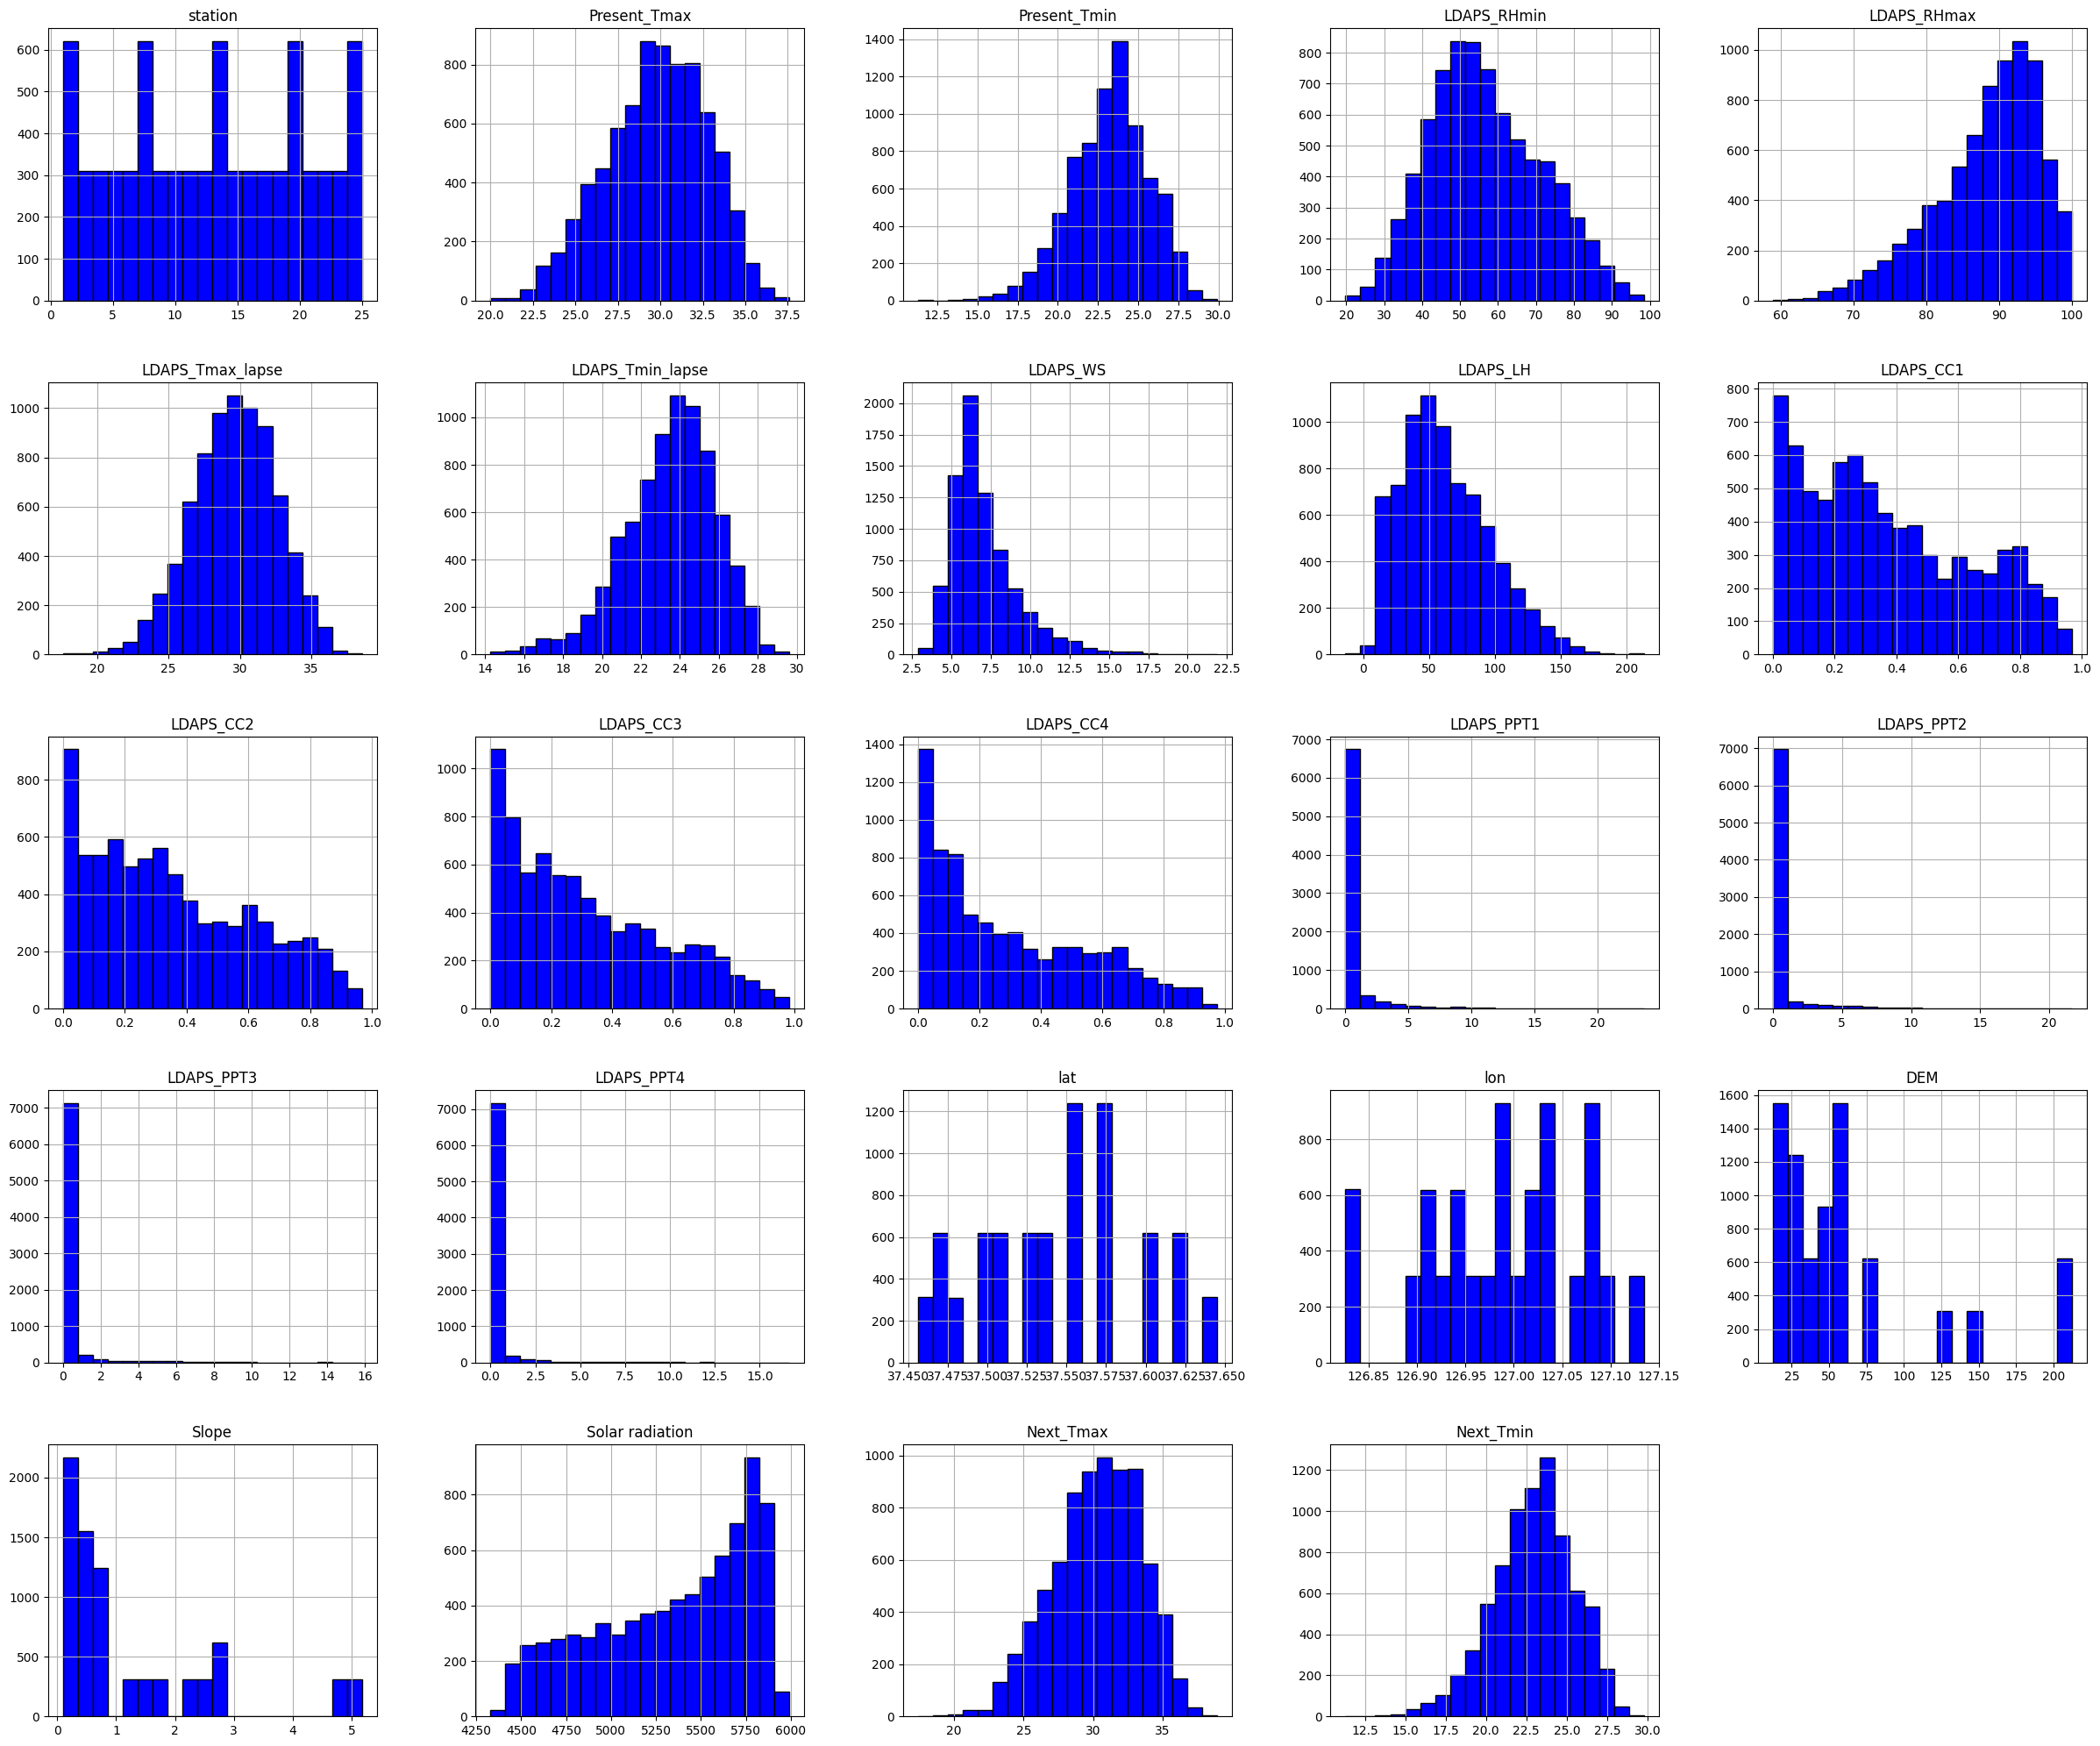

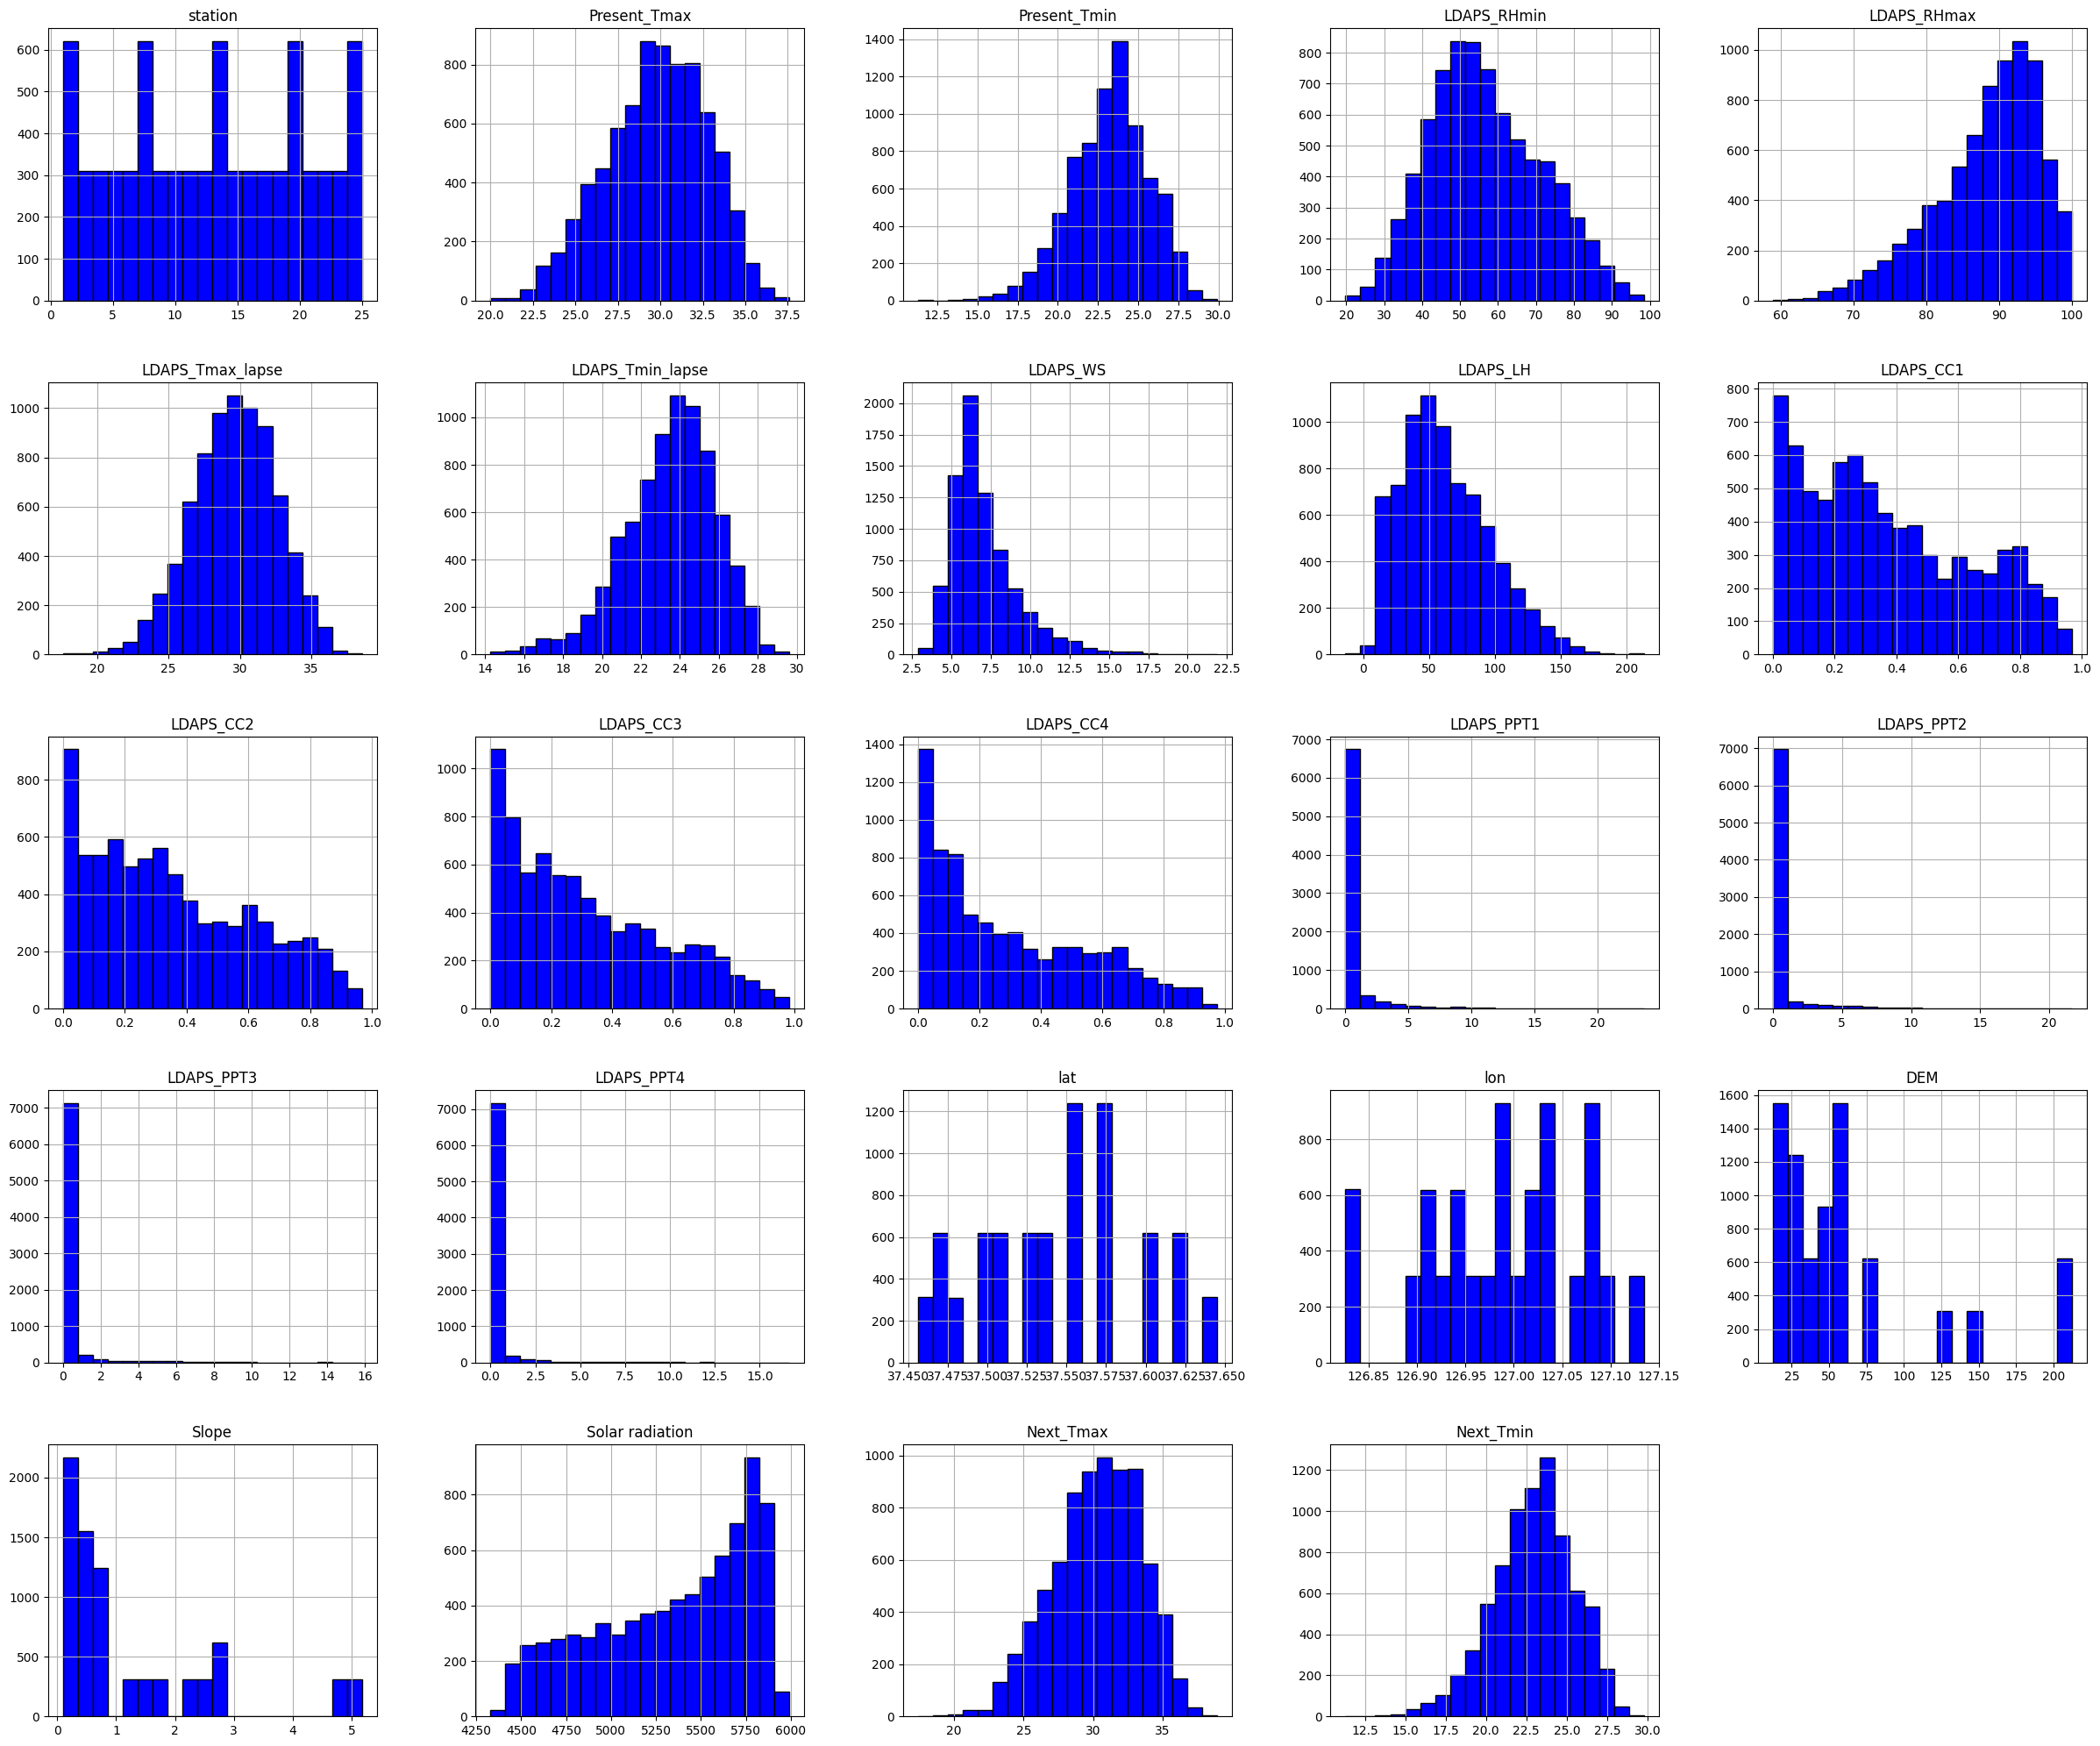

In [9]:
# Distribution of numeric columns which aids in identifying skewness, outliers, and whether scaling or normalization is needed.
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(figsize=(30, 25), bins=20, color='blue', edgecolor='black')
plt.show()

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(figsize=(30, 25), bins=20, color='blue', edgecolor='black')
plt.show()

<ipython-input-10-b6f320914f34>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


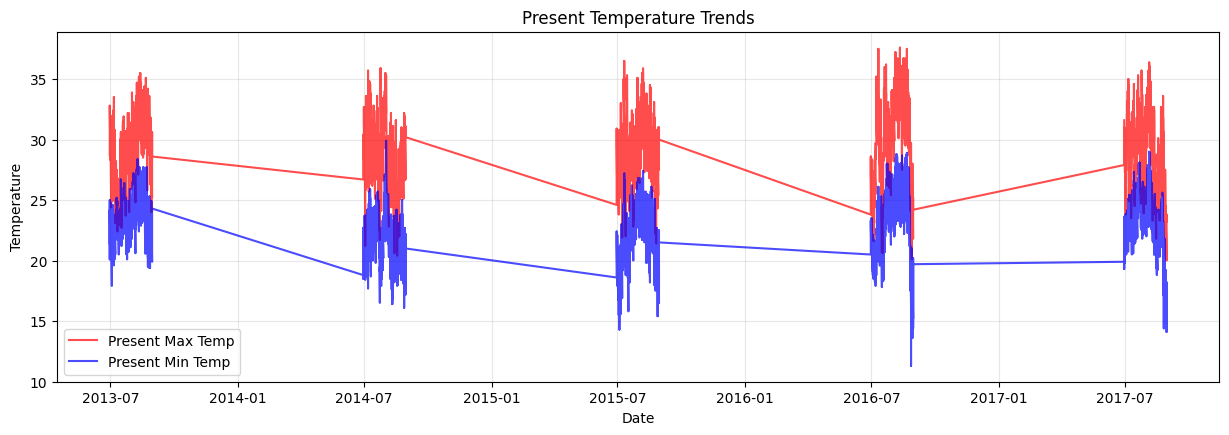

In [10]:
# Plotting the trends of present maximum and minimum temperatures over time.
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Present_Tmax'], label='Present Max Temp', color='red', alpha=0.7)
plt.plot(df['Date'], df['Present_Tmin'], label='Present Min Temp', color='blue', alpha=0.7)
plt.title('Present Temperature Trends')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True, alpha=0.3)

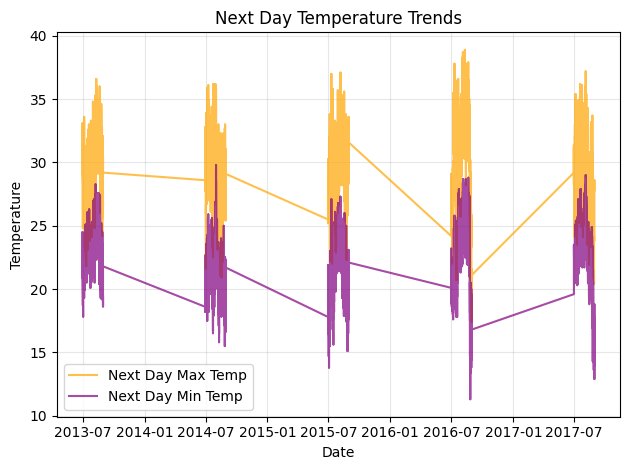

In [11]:
# Plotting the temperature trends for the next day's maximum and minimum temperatures ( Our Targets )
plt.plot(df['Date'], df['Next_Tmax'], label='Next Day Max Temp', color='orange', alpha=0.7)
plt.plot(df['Date'], df['Next_Tmin'], label='Next Day Min Temp', color='purple', alpha=0.7)
plt.title('Next Day Temperature Trends')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Creating a scatter map to visualize temperature distribution by location
fig = px.scatter_mapbox(df, lat="lat", lon="lon", color="Present_Tmax", size_max=15, zoom=5,title="Temperature Distribution by Location")
fig.update_layout(mapbox_style="open-street-map")
fig.show()

Text(0, 0.5, 'Latitude')

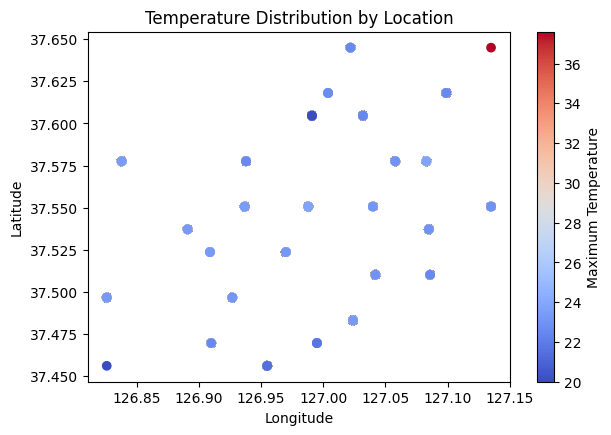

In [13]:
# Plot the distribution of maximum temperatures across different locations, with color representing temperature values based on longitude and latitude
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.scatter(df['lon'], df['lat'], c=df['Present_Tmax'], cmap='coolwarm')
plt.colorbar(label='Maximum Temperature')
plt.title('Temperature Distribution by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0.5, 1.0, 'Temperature vs Elevation')

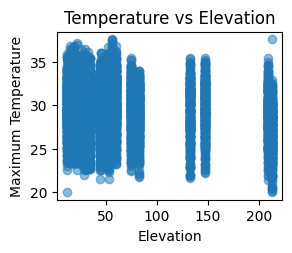

In [14]:
# Plotting to explore the relationship between elevation and maximum temperature.
plt.subplot(2, 2, 2)
plt.scatter(df['DEM'], df['Present_Tmax'], alpha=0.5)
plt.xlabel('Elevation')
plt.ylabel('Maximum Temperature')
plt.title('Temperature vs Elevation')

Text(0.5, 1.0, 'Temperature vs Slope')

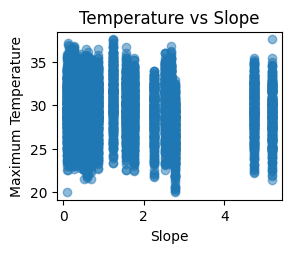

In [15]:
# Plotting to analyze how maximum temperature varies with slope to understand how temperature varies with changes in terrain steepness.
plt.subplot(2, 2, 3)
plt.scatter(df['Slope'], df['Present_Tmax'], alpha=0.5)
plt.xlabel('Slope')
plt.ylabel('Maximum Temperature')
plt.title('Temperature vs Slope')

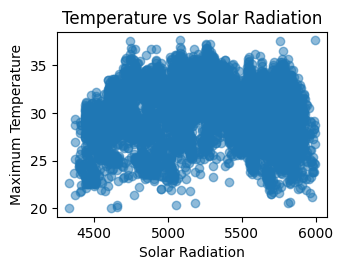

In [16]:
# Plotting to analyze how maximum temperature correlates with solar radiation to understand the impact of sunlight on temperature
plt.subplot(2, 2, 4)
plt.scatter(df['Solar radiation'], df['Present_Tmax'], alpha=0.5)
plt.xlabel('Solar Radiation')
plt.ylabel('Maximum Temperature')
plt.title('Temperature vs Solar Radiation')
plt.tight_layout()
plt.show()

# Data Cleaning

### Null Handling

How we deal with the nulls will differ depending on the type of columns.
- Numerical temprature columns will be imputed using median
- Remaining numerical columns will be imputed using mean

In [17]:
# Check for Missing Data
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().mean() * 100).round(2)
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print("Missing Values:\n", missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False))


Missing Values:
                   Missing Values  Percentage
LDAPS_CC1                     75        0.97
LDAPS_PPT4                    75        0.97
LDAPS_PPT2                    75        0.97
LDAPS_PPT1                    75        0.97
LDAPS_CC4                     75        0.97
LDAPS_CC3                     75        0.97
LDAPS_CC2                     75        0.97
LDAPS_LH                      75        0.97
LDAPS_WS                      75        0.97
LDAPS_Tmin_lapse              75        0.97
LDAPS_Tmax_lapse              75        0.97
LDAPS_RHmax                   75        0.97
LDAPS_RHmin                   75        0.97
LDAPS_PPT3                    75        0.97
Present_Tmin                  70        0.90
Present_Tmax                  70        0.90
Next_Tmax                     27        0.35
Next_Tmin                     27        0.35
Date                           2        0.03
station                        2        0.03


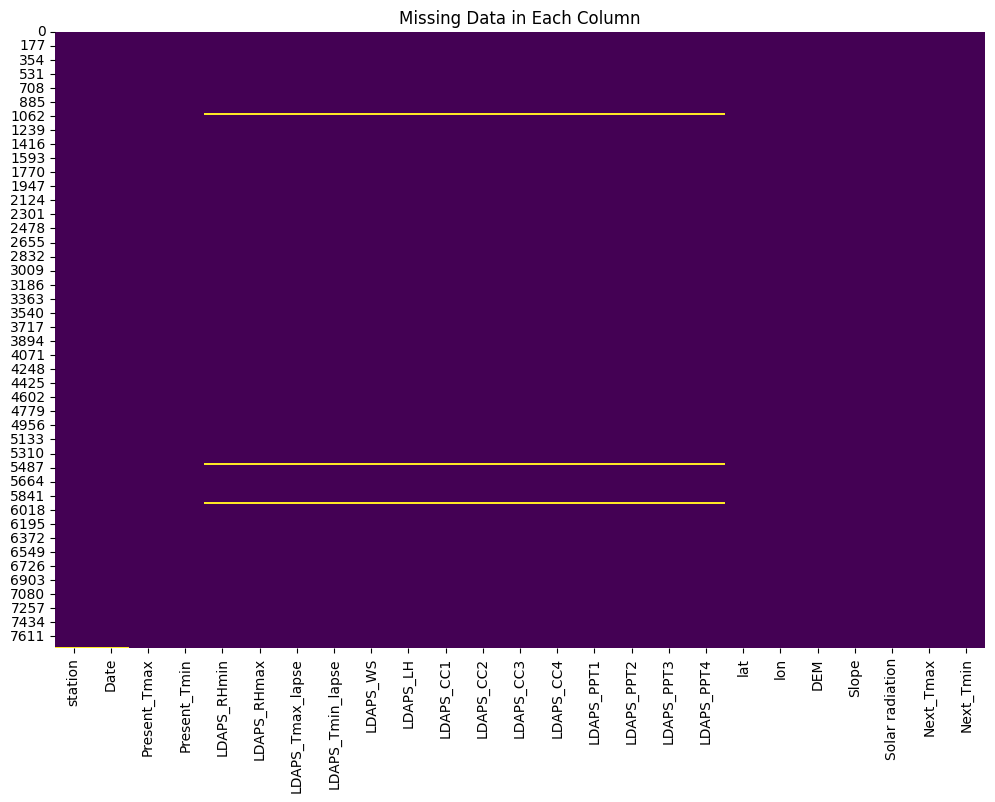

In [18]:
# Visualize Missing Data
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data in Each Column')
plt.show()

In [19]:
# =========== Mean, Mode Imputation  ===========

median_imputer = SimpleImputer(strategy='median')
mean_imputer = SimpleImputer(strategy='mean')
numeric_columns = df.select_dtypes(include=['float64']).columns

temp_columns = [col for col in numeric_columns if 'Tmax' in col or 'Tmin' in col]
df[temp_columns] = median_imputer.fit_transform(df[temp_columns])


other_columns = [col for col in numeric_columns if col not in temp_columns]
df[other_columns] = mean_imputer.fit_transform(df[other_columns])

### Outlier Handling

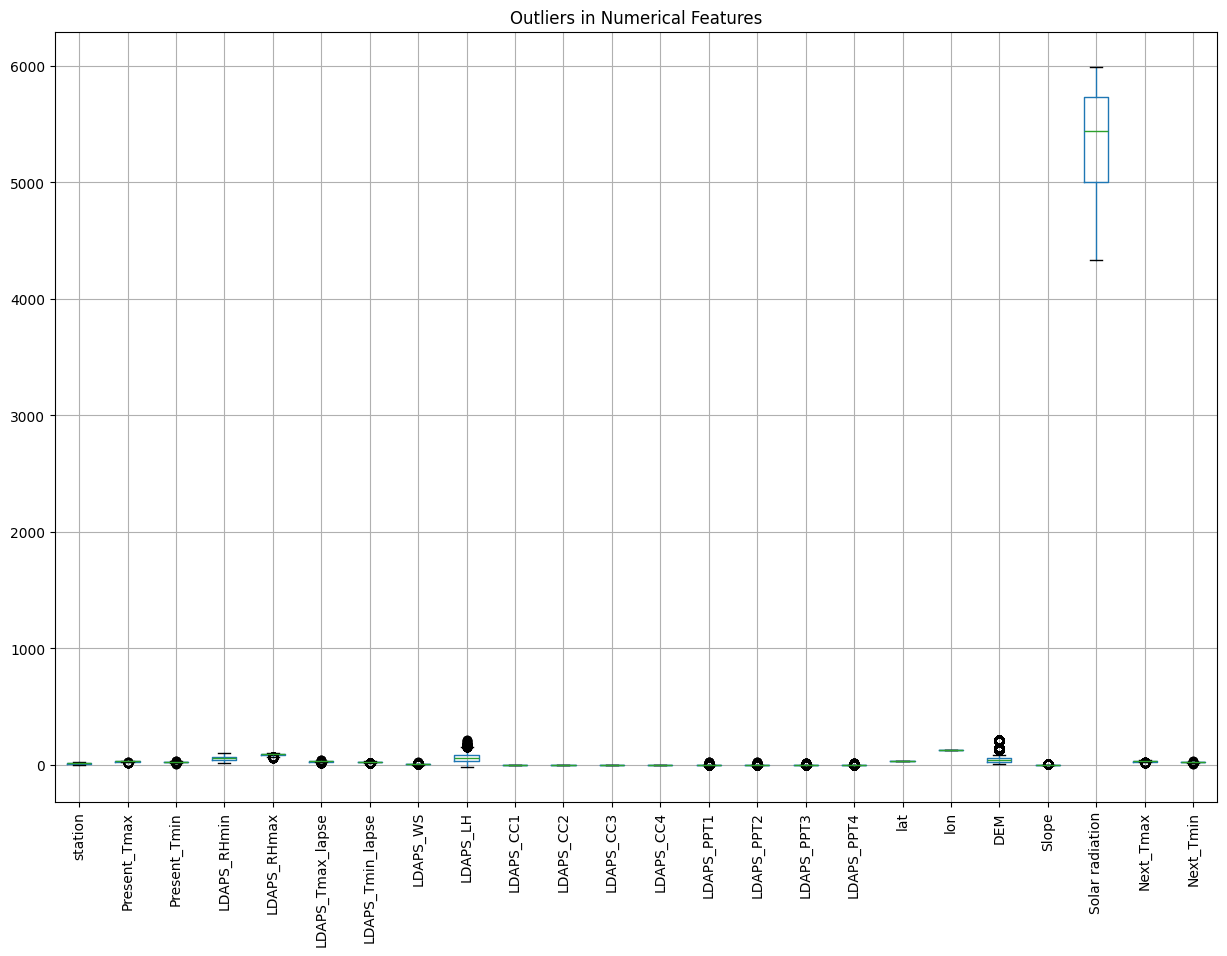

In [20]:
# Box Plot to Detect Outliers in Numerical Columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
df[numerical_features].boxplot()
plt.xticks(rotation=90)
plt.title('Outliers in Numerical Features')
plt.show()

In [21]:
"""
Replacing outliers in temperature columns using Z-score and IQR methods, setting outliers to the median.
Also, fill missing dates with the most recent date.
"""

temperature_columns = ['Present_Tmax', 'Present_Tmin', 'Next_Tmax', 'Next_Tmin']
for column in temperature_columns:
    Q1, Q3 = df[column].quantile(0.25), df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    df[column].fillna(df[column].median(), inplace=True)

df['Date'] = df['Date'].fillna(df['Date'].max())

<ipython-input-21-4efb8d6507ad>:13: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-21-4efb8d6507ad>:13: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

# Feature Engineering

In [22]:
# Add date-based features from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Season'] = pd.cut(df['Date'].dt.month, bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Fall'])
df['Daily_Temp_Range'] = df['Present_Tmax'] - df['Present_Tmin']
df['Date_Timestamp'] = df['Date'].apply(lambda x: x.timestamp())

In [23]:
"""
Generate temperature statistics such as
temperature_summary which gives basic stats for today's and tomorrow's max and min temperatures.
monthly_averages gets average max and min temperatures for each month.
seasonal_averages provides average max and min temperatures by season.
temperature_range_stats summarizes the daily temperature range.
"""

temperature_summary = df[['Present_Tmax', 'Present_Tmin', 'Next_Tmax', 'Next_Tmin']].describe()
monthly_averages = df.groupby('Month')[['Present_Tmax', 'Present_Tmin']].mean()
seasonal_averages = df.groupby('Season')[['Present_Tmax', 'Present_Tmin']].mean()
temperature_range_stats = df['Daily_Temp_Range'].describe()

stats_dict = {
    'Temperature_Summary': temperature_summary,
    'Monthly_Averages': monthly_averages,
    'Seasonal_Averages': seasonal_averages,
    'Temperature_Range_Stats': temperature_range_stats
}
stats_dict

<ipython-input-23-a7c5bf6c7b6c>:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



{'Temperature_Summary':        Present_Tmax  Present_Tmin    Next_Tmax    Next_Tmin
 count   7752.000000   7752.000000  7752.000000  7752.000000
 mean      29.770666     23.237294    30.280818    22.946401
 std        2.952794      2.369510     3.106574     2.441776
 min       21.500000     16.900000    21.600000    16.600000
 25%       27.800000     21.700000    28.200000    21.400000
 50%       29.900000     23.400000    30.500000    23.100000
 75%       32.000000     24.900000    32.600000    24.600000
 max       37.600000     29.700000    38.900000    29.400000,
 'Monthly_Averages':        Present_Tmax  Present_Tmin
 Month                            
 6         29.368000     21.943200
 7         29.338581     23.091174
 8         30.230330     23.431317,
 'Seasonal_Averages':         Present_Tmax  Present_Tmin
 Season                            
 Winter           NaN           NaN
 Spring     29.368000     21.943200
 Summer     29.777265     23.258503
 Fall             NaN         

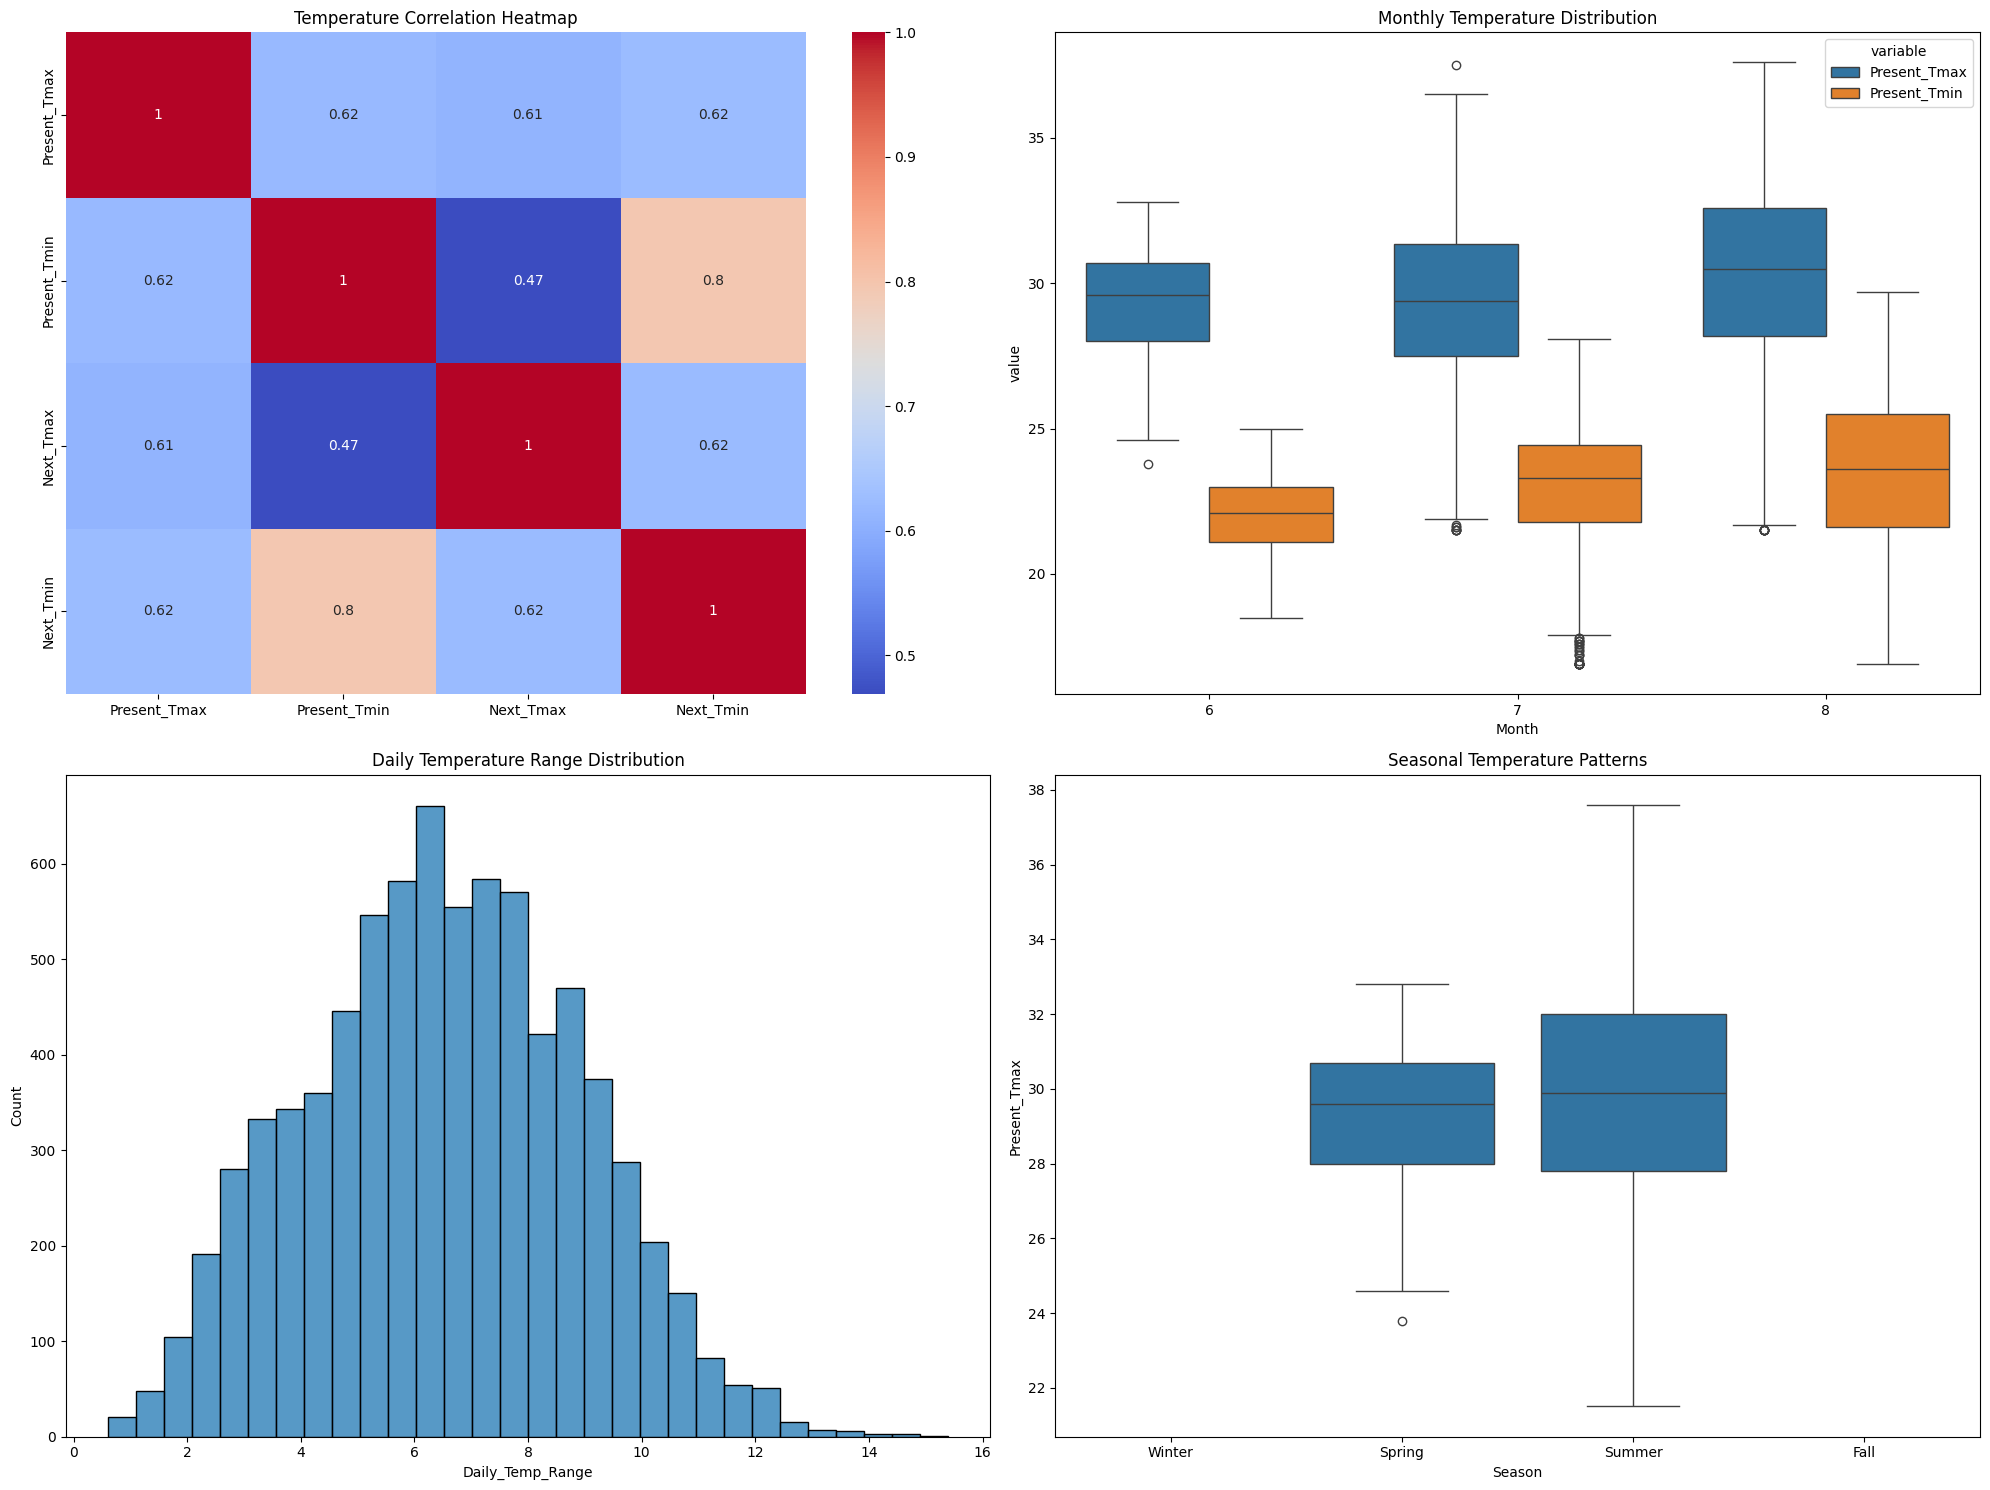

In [24]:
#============= Monthly and seasonal temperature ===============
fig, axes = plt.subplots(2, 2, figsize=(20, 15))


df_melted = pd.melt(df, id_vars=['Month'], value_vars=['Present_Tmax', 'Present_Tmin'])
sns.boxplot(x='Month', y='value', hue='variable', data=df_melted, ax=axes[0, 1])
axes[0, 1].set_title('Monthly Temperature Distribution')


sns.histplot(data=df, x='Daily_Temp_Range', bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Daily Temperature Range Distribution')


sns.boxplot(x='Season', y='Present_Tmax', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Seasonal Temperature Patterns')


temp_cols = ['Present_Tmax', 'Present_Tmin', 'Next_Tmax', 'Next_Tmin']
correlation = df[temp_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Temperature Correlation Heatmap')

plt.tight_layout()
plt.show()


# Feature Selection

### Train and Test Data for Feature Selection

In [25]:
# Feature Selection for Training
X = df.drop(columns=['Next_Tmin','Next_Tmax','Year','Month','Season','Date'])
y = df['Next_Tmin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Correlation Matrix Visualization

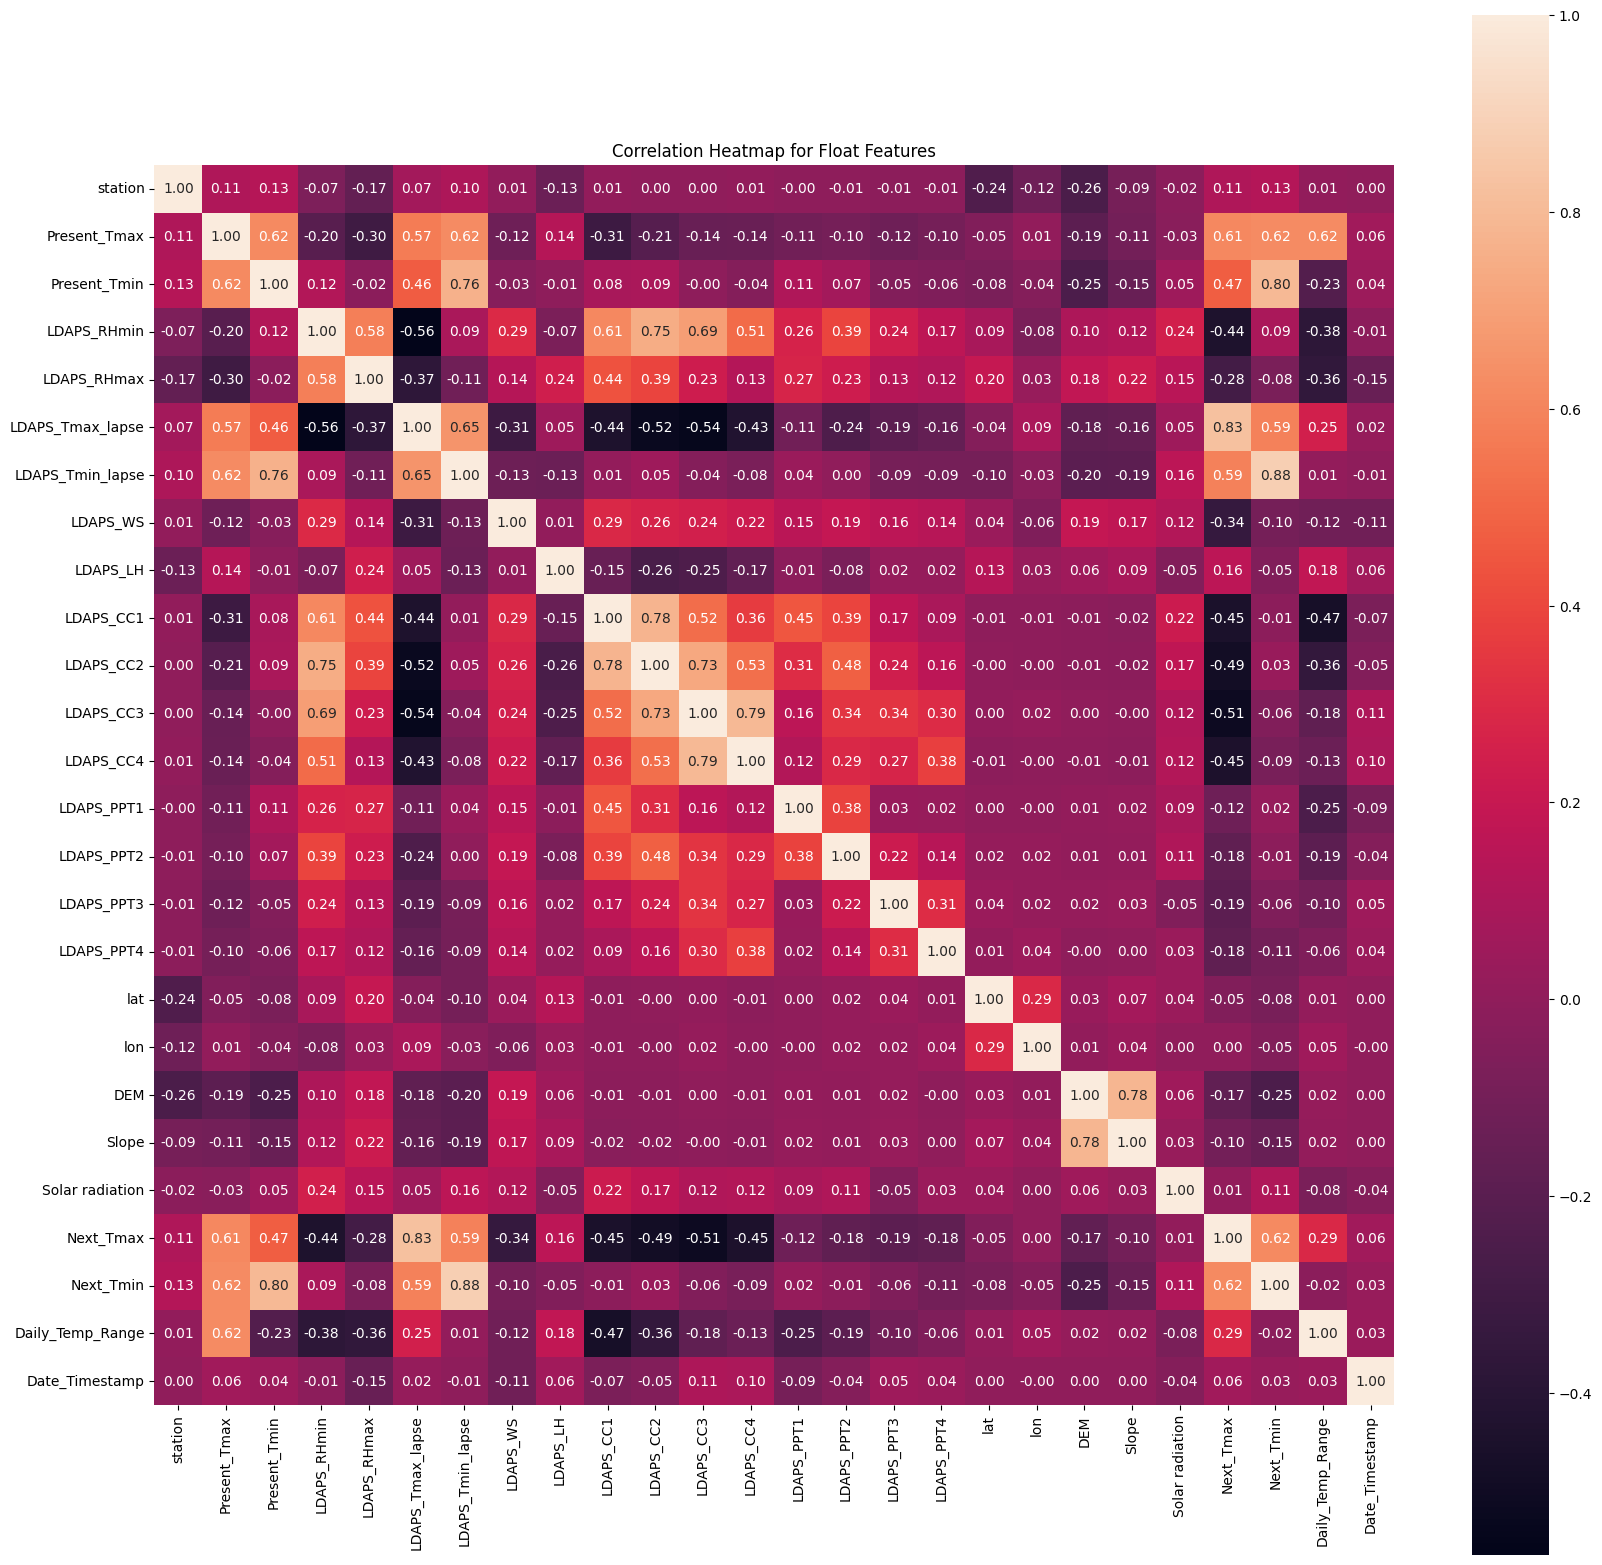

In [26]:
# Select only float columns for correlation analysis to drop highest correlated features
float_columns = df.select_dtypes(include=['float64']).columns
correlation_matrix = df[float_columns].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True)
plt.title('Correlation Heatmap for Float Features')
plt.show()

### Sequential Forward Selection (SFS)

In [27]:
# Initialize SFS with RandomForestRegressor as the estimator
"""sfs = SequentialFeatureSelector(estimator=RandomForestRegressor(),
                                 n_features_to_select=20,
                                 direction='forward',
                                 scoring='r2',
                                 cv=5)
sfs.fit(X_train, y_train)

# Selected top k features from SFS
selected_features_sfs = sfs.get_support(indices=True)
print("Selected features (SFS):", selected_features_sfs)"""

'sfs = SequentialFeatureSelector(estimator=RandomForestRegressor(),\n                                 n_features_to_select=20,\n                                 direction=\'forward\',\n                                 scoring=\'r2\',\n                                 cv=5)\nsfs.fit(X_train, y_train)\n\n# Selected top k features from SFS\nselected_features_sfs = sfs.get_support(indices=True)\nprint("Selected features (SFS):", selected_features_sfs)'

In [28]:
# Top 20 features extracted by SFS
sfs_features = ["station", "LDAPS_RHmax", "LDAPS_Tmax_lapse", "LDAPS_WS", "LDAPS_LH",
            "LDAPS_CC1", "LDAPS_CC2", "LDAPS_CC3", "LDAPS_CC4", "LDAPS_PPT1",
            "LDAPS_PPT2", "LDAPS_PPT3", "LDAPS_PPT4", "lat", "lon", "DEM",
            "Slope", "Solar radiation", "Daily_Temp_Range"]

### Sequential Backward Selection (SBS)

In [29]:
# Initialize SBS with RandomForestRegressor as the estimator
"""sbs = SequentialFeatureSelector(estimator=RandomForestRegressor(),
                                 n_features_to_select=15,
                                 direction='backward',
                                 scoring='r2',
                                 cv=5)
sbs.fit(X_train, y_train)

# Selected features from SBS
selected_features_sbs = sbs.get_support(indices=True)
print("Selected features (SBS):", selected_features_sbs)"""

'sbs = SequentialFeatureSelector(estimator=RandomForestRegressor(),\n                                 n_features_to_select=15,\n                                 direction=\'backward\',\n                                 scoring=\'r2\',\n                                 cv=5)\nsbs.fit(X_train, y_train)\n\n# Selected features from SBS\nselected_features_sbs = sbs.get_support(indices=True)\nprint("Selected features (SBS):", selected_features_sbs)'

In [30]:
# Return features based on call
def features_method(method_type):

    sfs_features = ["station", "LDAPS_RHmax", "LDAPS_Tmax_lapse", "LDAPS_WS", "LDAPS_LH",
            "LDAPS_CC1", "LDAPS_CC2", "LDAPS_CC3", "LDAPS_CC4", "LDAPS_PPT1",
            "LDAPS_PPT2", "LDAPS_PPT3", "LDAPS_PPT4", "lat", "lon", "DEM",
            "Slope", "Solar radiation", "Daily_Temp_Range"]

    sbs_features = [
        'station', 'Present_Tmax', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_WS',
        'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
        'LDAPS_PPT1', 'lat', 'lon', 'Slope', 'Solar radiation', 'DEM'
    ]

    kbest_features = SelectKBest(score_func=f_regression)

    feature_map = {
        "SFS": sfs_features,
        "SBS": sbs_features,
        "KBest": kbest_features
    }
    return feature_map.get(method_type, [])

# Model Training and Evaluation

### Helper Functions and Variables

In [31]:
# Store metrics for each model
models={}

In [32]:
# Plot learning curve
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,
        train_sizes=[0.2, 0.4, 0.6, 0.8, 1]
    )

    train_rmse_mean = np.sqrt(-np.mean(train_scores, axis=1))
    test_rmse_mean = np.sqrt(-np.mean(test_scores, axis=1))

    plt.figure(figsize=(10, 6))


    plt.plot(train_sizes, train_rmse_mean, marker='o', linestyle='-', color='royalblue',
             linewidth=2, markersize=8, label='Training RMSE')
    plt.plot(train_sizes, test_rmse_mean, marker='s', linestyle='--', color='orange',
             linewidth=2, markersize=8, label='Validation RMSE')

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Training Sizes', fontsize=14)
    plt.ylabel('Root Mean Squared Error', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


In [33]:
# Print results and store metrics for each model in a dictionary for later comparison
def evaluate_model(model_name, y_test, y_pred):
    models[model_name] = {
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'mae': mean_absolute_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred)
    }

    # Display Results
    print(f"Metrics for {model_name}:")
    for metric, value in models[model_name].items():
        print(f"{metric.upper()}: {value:.4f}")

    print("\nTest Results:")
    print(f"Test RMSE: {models[model_name]['rmse']:.4f}")
    print(f"Test MAE: {models[model_name]['mae']:.4f}")
    print(f"Test R²: {models[model_name]['r2']:.4f}")

## Model 1: Random Forest

### Random Forest ( Without Feature Selection and Hyperparameters)


In [35]:
# Train/Test Split
X = df.drop(columns=['Next_Tmin', 'Next_Tmax', 'Year', 'Month', 'Season', 'Date'])
y = df['Next_Tmin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Model Setup
model = RandomForestRegressor()

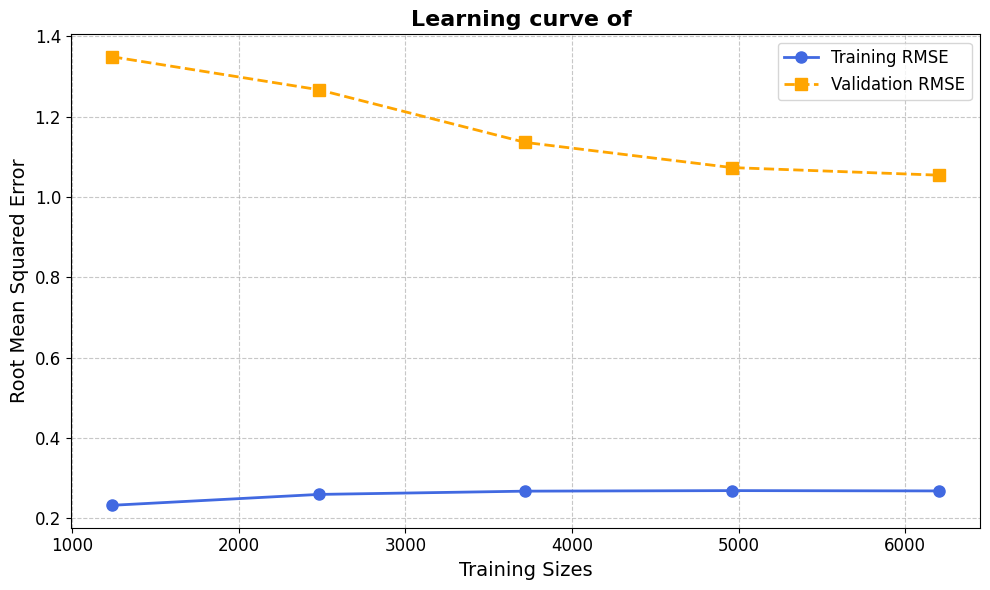

In [37]:
# Learning Curve
plot_learning_curve(model, X, y, title="Learning curve of ")

In [38]:
# Model fitting
model.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
# Evaluate Model
y_pred = model.predict(X_test)
evaluate_model("RF_WFS_WHP", y_test,y_pred)

Metrics for RF_WFS_WHP:
RMSE: 0.7261
MAE: 0.5451
R2: 0.9122

Test Results:
Test RMSE: 0.7261
Test MAE: 0.5451
Test R²: 0.9122


### Random Forest ( Without Feature Selection )


In [40]:
# Train/Test Split
X = df.drop(columns=['Next_Tmin', 'Next_Tmax', 'Year', 'Month', 'Season', 'Date'])
y = df['Next_Tmin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Model Setup
"""
Parameters were chosen mostly by grid search, however, because learning curve showed signs of overfitting
setting depth to low value as well as larger leaf size and max_features adds diversity and more
generalization going forward
"""
model = RandomForestRegressor(n_estimators=30, max_depth= 10, min_samples_leaf=15,max_features='sqrt', random_state=42)


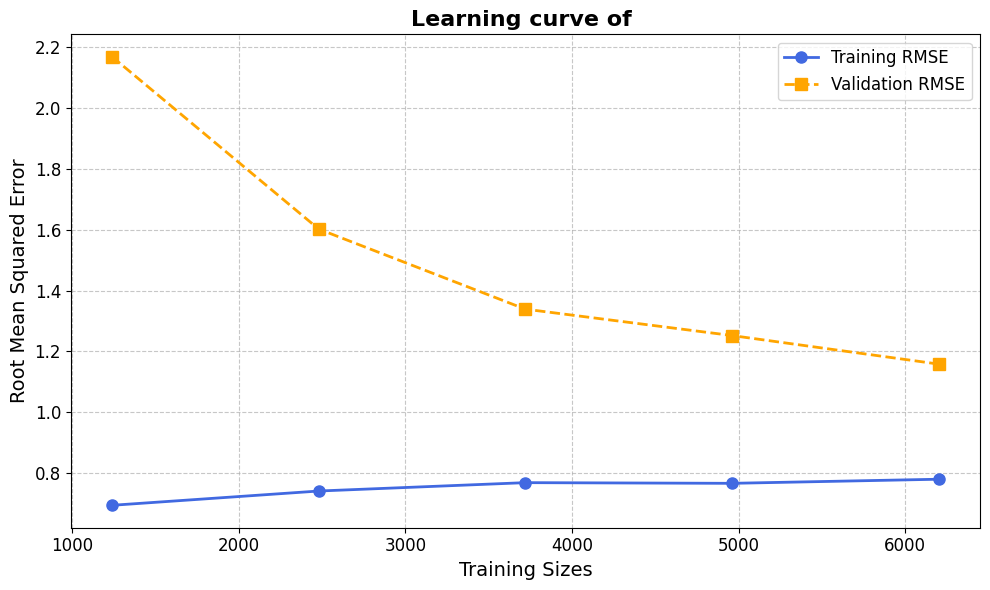

In [42]:
# Learning Curve
plot_learning_curve(model, X, y, title="Learning curve of ")

In [43]:
# Model fitting
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=15,
                      n_estimators=30, random_state=42)

In [44]:
# Hyperparameter Tuning

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}


grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extract best parameters, RMSE, and best model
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)
print("Best RMSE on Training Data:", best_rmse)

Best Parameters: {'max_depth': 20, 'n_estimators': 150}
Best RMSE on Training Data: 0.9046956683113331


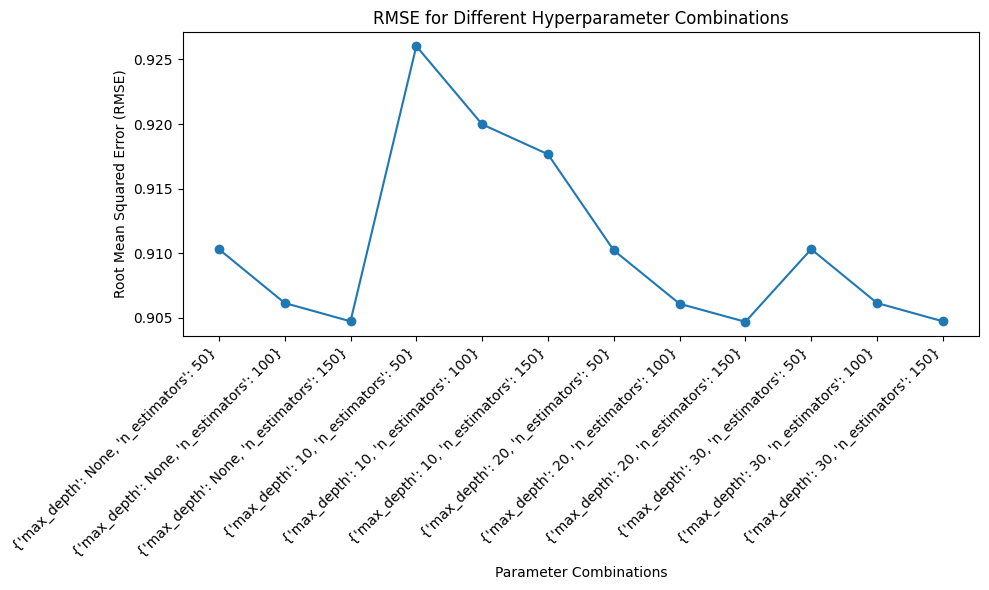

In [45]:
# Plot the RMSE for each parameter combination
results = grid_search.cv_results_
mean_rmse = np.sqrt(-results['mean_test_score'])
param_combinations = [str(params) for params in results['params']]

plt.figure(figsize=(10, 6))
plt.plot(param_combinations, mean_rmse, marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Parameter Combinations")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("RMSE for Different Hyperparameter Combinations")
plt.tight_layout()
plt.show()


In [46]:
# Evaluate Model
y_pred = best_model.predict(X_test)
evaluate_model("RF_WFS", y_test,y_pred)


Metrics for RF_WFS:
RMSE: 0.8252
MAE: 0.6503
R2: 0.8866

Test Results:
Test RMSE: 0.8252
Test MAE: 0.6503
Test R²: 0.8866


### Random Forest ( With Feature Selection )


In [47]:
# Train/Test Split
X = df.drop(columns=['Next_Tmin', 'Next_Tmax', 'Year', 'Month', 'Season', 'Date'])
y = df['Next_Tmin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Feature Selection
feature_selector = features_method("KBest")
X_train = feature_selector.fit_transform(X_train, y_train)
X_test = feature_selector.transform(X_test)

In [49]:
# Model Setup
model = RandomForestRegressor(n_estimators=50, max_depth= 10, min_samples_leaf=5,max_features='sqrt', random_state=42)

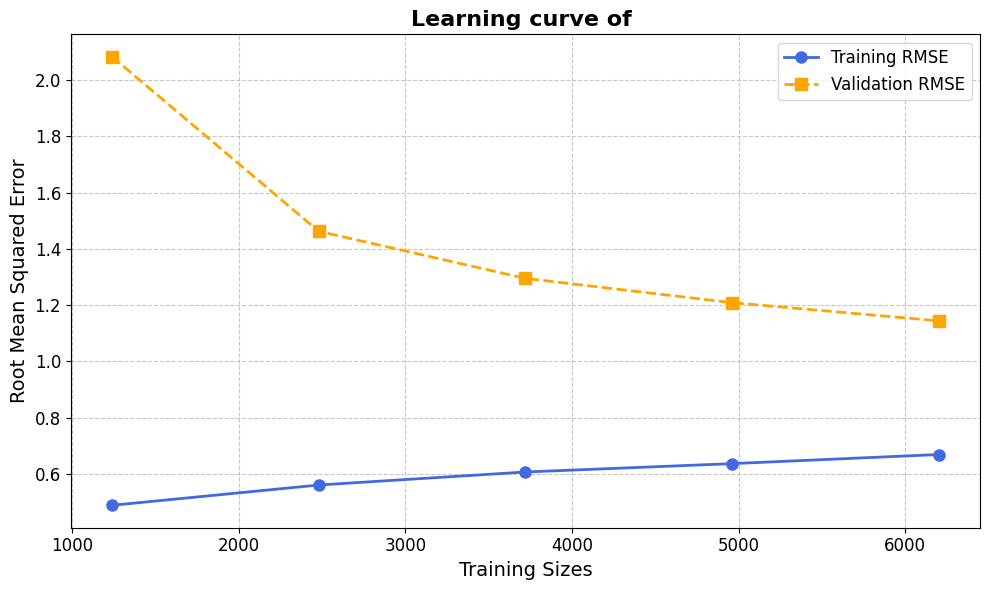

In [50]:
# Learning Curve
plot_learning_curve(model, X, y, title="Learning curve of ")

In [51]:
# Model fitting
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                      n_estimators=50, random_state=42)

In [52]:
# Hyperparameter Tuning

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extract best parameters, RMSE, and best model
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)
print("Best RMSE on Training Data:", best_rmse)

Best Parameters: {'max_depth': None, 'n_estimators': 150}
Best RMSE on Training Data: 0.8683216238512848


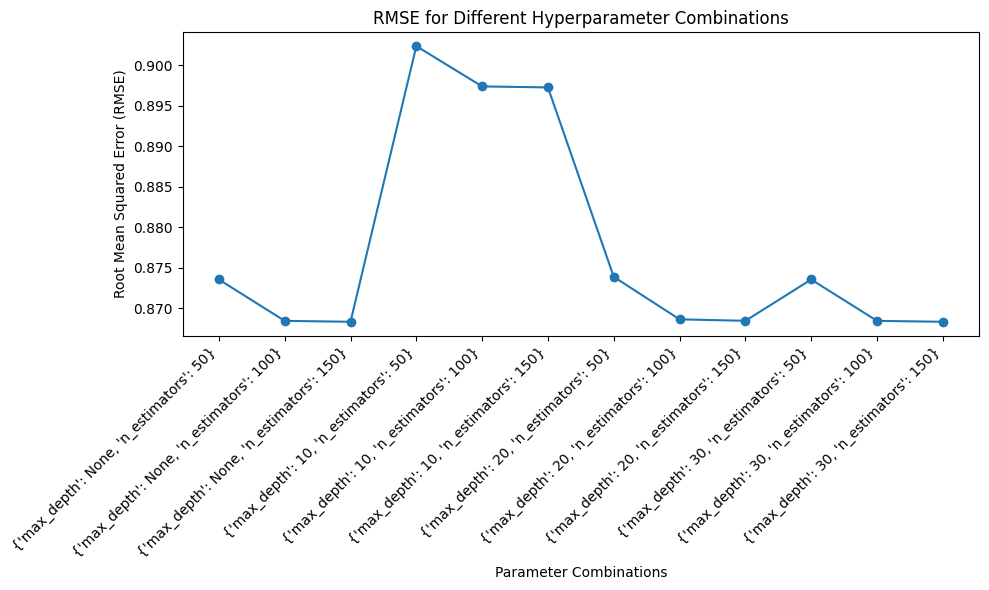

In [53]:
# Plot the RMSE for each parameter combination
results = grid_search.cv_results_
mean_rmse = np.sqrt(-results['mean_test_score'])
param_combinations = [str(params) for params in results['params']]

plt.figure(figsize=(10, 6))
plt.plot(param_combinations, mean_rmse, marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Parameter Combinations")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("RMSE for Different Hyperparameter Combinations")
plt.tight_layout()
plt.show()


In [54]:
# Evaluate Model
y_pred = best_model.predict(X_test)
evaluate_model("RF_FS", y_test,y_pred)


Metrics for RF_FS:
RMSE: 0.8025
MAE: 0.6172
R2: 0.8927

Test Results:
Test RMSE: 0.8025
Test MAE: 0.6172
Test R²: 0.8927


## Model 2: Linear Regression

### Linear Regression ( Without Feature Selection and Hyperparameters)

In [55]:
# Train/Test Split
X = df.drop(columns=['Next_Tmin', 'Next_Tmax', 'Year', 'Month', 'Season', 'Date'])
y = df['Next_Tmin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Model Setup
model = LinearRegression()

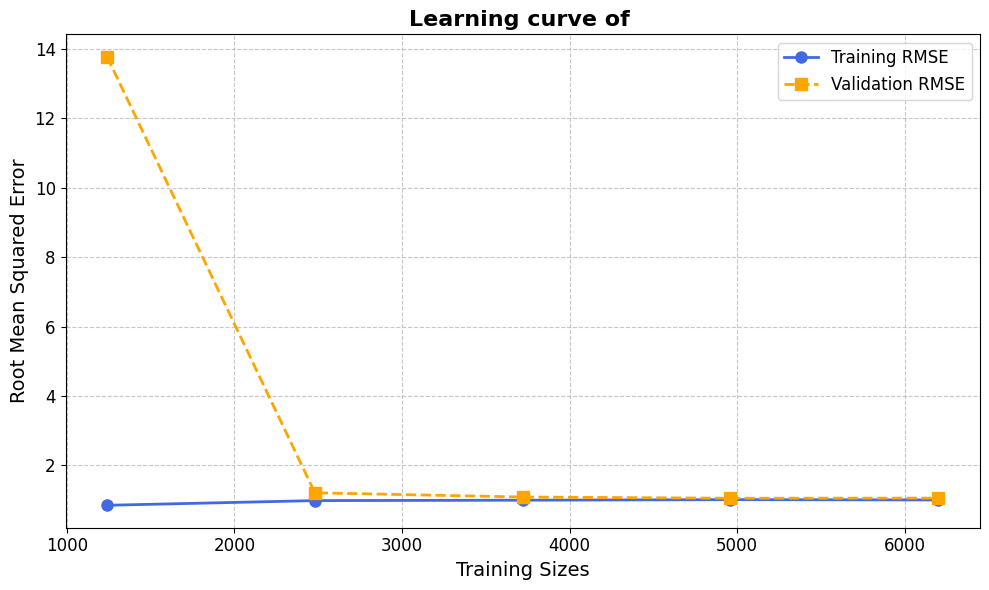

In [57]:
# Learning Curve
plot_learning_curve(model, X, y, title="Learning curve of ")

In [58]:
# Model fitting
model.fit(X_train, y_train)

LinearRegression()

In [59]:
# Evaluate Model
y_pred = model.predict(X_test)
evaluate_model("LR_WFS_WHP", y_test,y_pred)

Metrics for LR_WFS_WHP:
RMSE: 0.9739
MAE: 0.7619
R2: 0.8420

Test Results:
Test RMSE: 0.9739
Test MAE: 0.7619
Test R²: 0.8420


### Linear Regression ( Without Feature Selection )

In [60]:
# Train/Test Split
X = df.drop(columns=['Next_Tmin', 'Next_Tmax', 'Year', 'Month', 'Season', 'Date'])
y = df['Next_Tmin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Model Setup
model = LinearRegression()

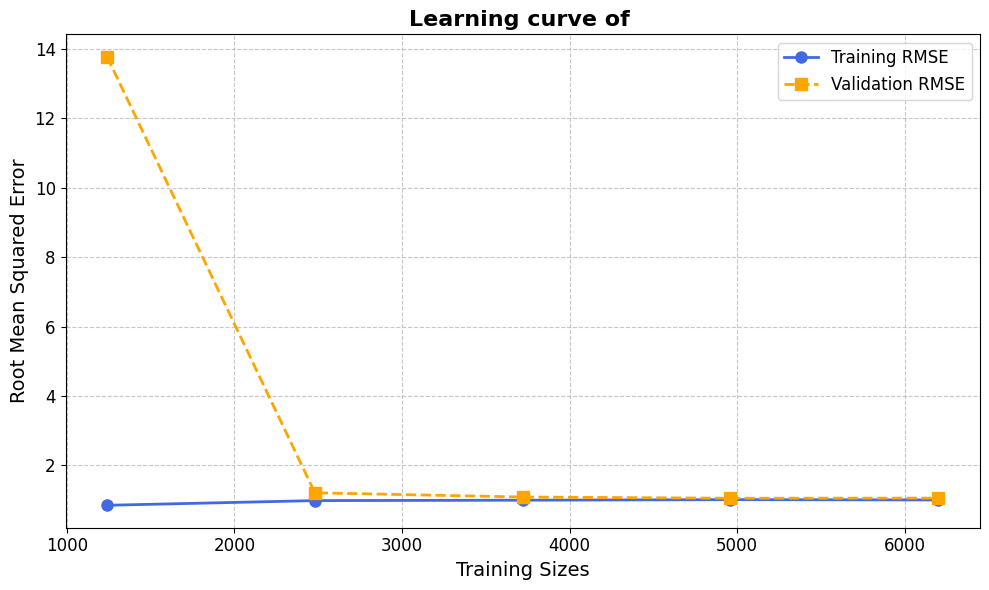

In [62]:
# Learning Curve
plot_learning_curve(model, X, y, title="Learning curve of ")

In [63]:
# Model fitting
model.fit(X_train, y_train)

LinearRegression()

In [65]:
# Evaluate Model
y_pred = model.predict(X_test)
evaluate_model("LR_WFS", y_test,y_pred)

Metrics for LR_WFS:
RMSE: 0.9739
MAE: 0.7619
R2: 0.8420

Test Results:
Test RMSE: 0.9739
Test MAE: 0.7619
Test R²: 0.8420


### Linear Regression ( With Feature Selection )

In [66]:
# Train/Test Split
features = features_method("SFS")
X = df[features]
y = df['Next_Tmin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Model Setup
model = LinearRegression()


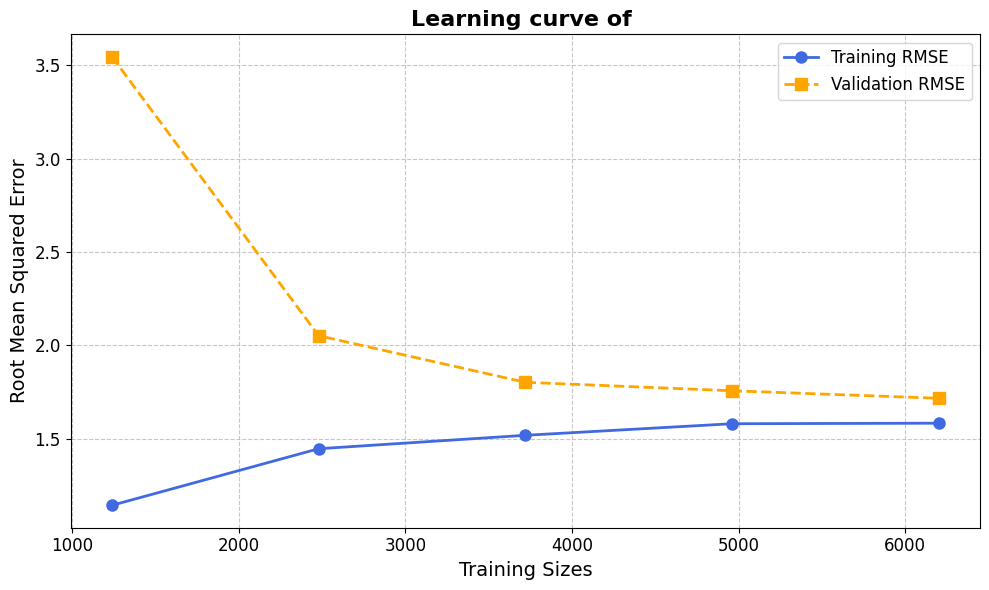

In [68]:
# Learning Curve
plot_learning_curve(model, X, y, title="Learning curve of ")

In [69]:
# Model fitting
model.fit(X_train, y_train)

LinearRegression()

In [84]:
# Evaluate Model
y_pred = model.predict(X_test)
evaluate_model("LR_FS", y_test,y_pred)

Metrics for LR_FS:
RMSE: 0.8546
MAE: 0.6686
R2: 0.8784

Test Results:
Test RMSE: 0.8546
Test MAE: 0.6686
Test R²: 0.8784


## Model 3: LightGBM

### LightGBM ( Without Feature Selection and Hyperparameters)

In [85]:
# Train/Test Split
X = df.drop(columns=['Next_Tmin', 'Next_Tmax', 'Year', 'Month', 'Season', 'Date'])
y = df['Next_Tmin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Model Setup
model = lgb.LGBMRegressor()

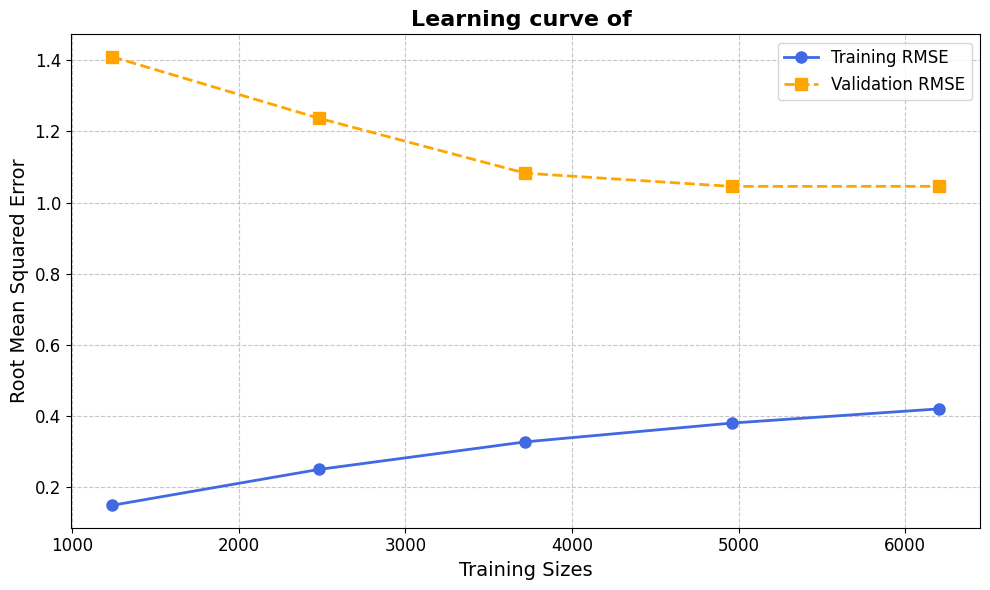

In [87]:
# Learning Curve
plot_learning_curve(model, X, y, title="Learning curve of ")

In [88]:
# Model fitting
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4698
[LightGBM] [Info] Number of data points in the train set: 6201, number of used features: 24
[LightGBM] [Info] Start training from score 22.948476


LGBMRegressor()

In [89]:
# Evaluate Model
y_pred = model.predict(X_test)
evaluate_model("LGBM_WFS_WHP", y_test,y_pred)

Metrics for LGBM_WFS_WHP:
RMSE: 0.6067
MAE: 0.4614
R2: 0.9387

Test Results:
Test RMSE: 0.6067
Test MAE: 0.4614
Test R²: 0.9387


### LightGBM ( Without Feature Selection )

In [90]:
# Train/Test Split
X = df.drop(columns=['Next_Tmin', 'Next_Tmax', 'Year', 'Month', 'Season', 'Date'])
y = df['Next_Tmin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Model Setup
model = lgb.LGBMRegressor(learning_rate= 0.1, n_estimators= 30, max_depth=10, reg_alpha=0.1,reg_lambda=0.1,  random_state=42)

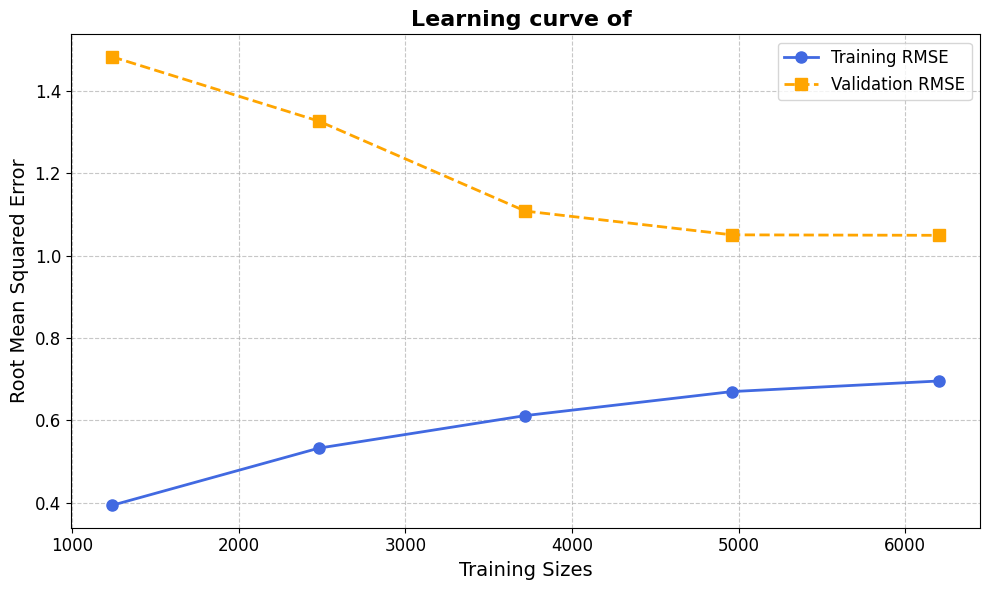

In [92]:
# Learning Curve
plot_learning_curve(model, X, y, title="Learning curve of ")

In [93]:
# Model fitting
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4698
[LightGBM] [Info] Number of data points in the train set: 6201, number of used features: 24
[LightGBM] [Info] Start training from score 22.948476


LGBMRegressor(max_depth=10, n_estimators=30, random_state=42, reg_alpha=0.1,
              reg_lambda=0.1)

In [94]:
# Hyperparameter Tuning

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
}


grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extract best parameters, RMSE, and best model
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)
print("Best RMSE on Training Data:", best_rmse)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4698
[LightGBM] [Info] Number of data points in the train set: 6201, number of used features: 24
[LightGBM] [Info] Start training from score 22.948476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 150}
Best RMSE on Training Data: 0.6024109851532282


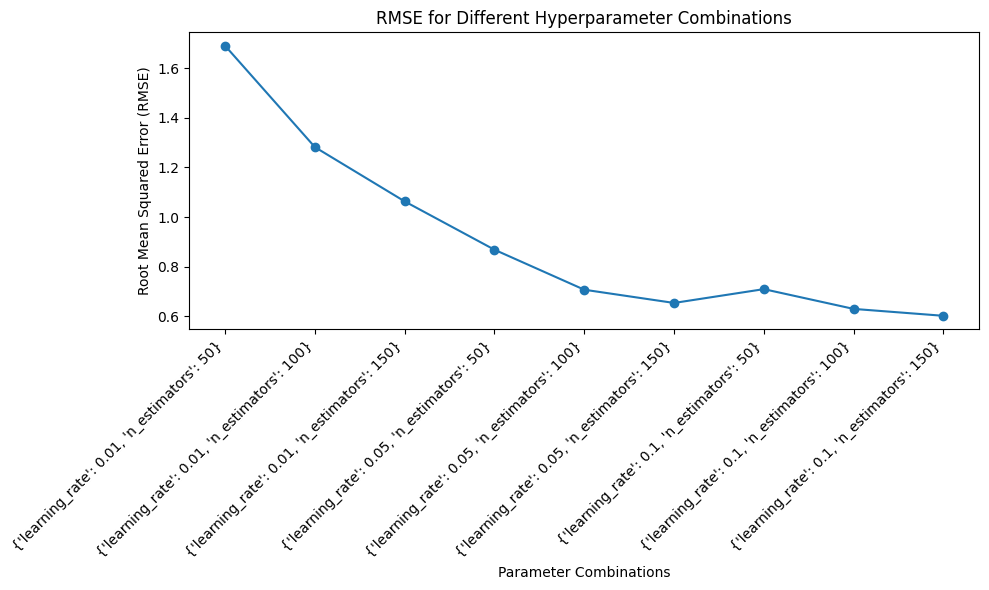

In [95]:
# Plot the RMSE for each parameter combination
results = grid_search.cv_results_
mean_rmse = np.sqrt(-results['mean_test_score'])
param_combinations = [str(params) for params in results['params']]

plt.figure(figsize=(10, 6))
plt.plot(param_combinations, mean_rmse, marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Parameter Combinations")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("RMSE for Different Hyperparameter Combinations")
plt.tight_layout()
plt.show()


In [96]:
# Evaluate Model
y_pred = best_model.predict(X_test)
evaluate_model("LGBM_WFS", y_test,y_pred)

Metrics for LGBM_WFS:
RMSE: 0.5728
MAE: 0.4356
R2: 0.9454

Test Results:
Test RMSE: 0.5728
Test MAE: 0.4356
Test R²: 0.9454


### LightGBM ( With Feature Selection )

In [97]:
# Train/Test Split
X = df.drop(columns=['Next_Tmin', 'Next_Tmax', 'Year', 'Month', 'Season', 'Date'])
y = df['Next_Tmin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Feature Selection
feature_selector = features_method("KBest")
X_train = feature_selector.fit_transform(X_train, y_train)
X_test = feature_selector.transform(X_test)

In [99]:
# Model Setup
model = lgb.LGBMRegressor(learning_rate= 0.1, n_estimators= 30, max_depth=10, reg_alpha=0.1,reg_lambda=0.1,  random_state=42)

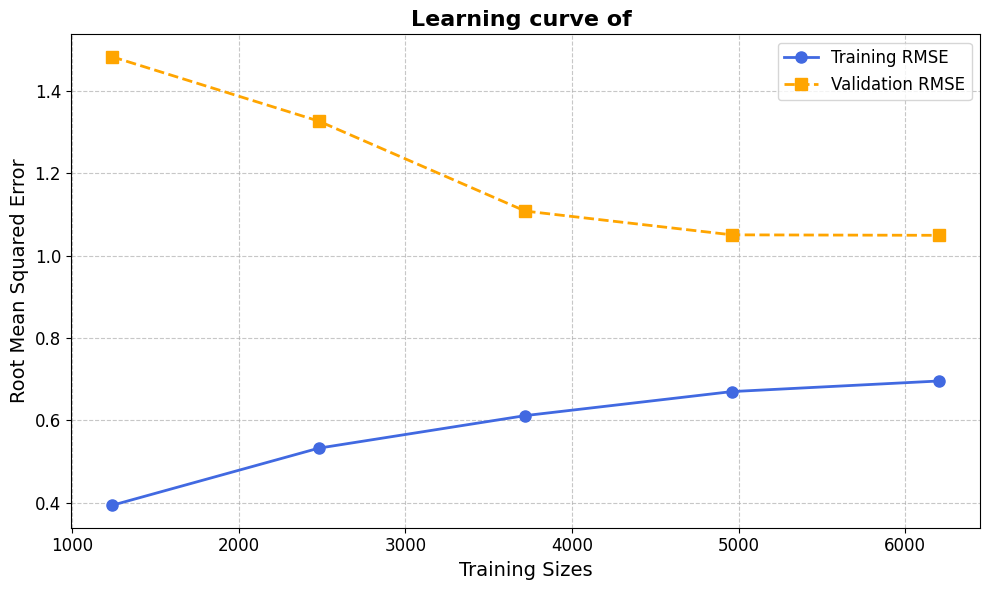

In [100]:
# Learning Curve
plot_learning_curve(model, X, y, title="Learning curve of ")

In [101]:
# Model fitting
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1627
[LightGBM] [Info] Number of data points in the train set: 6201, number of used features: 10
[LightGBM] [Info] Start training from score 22.948476


LGBMRegressor(max_depth=10, n_estimators=30, random_state=42, reg_alpha=0.1,
              reg_lambda=0.1)

In [102]:
# Hyperparameter Tuning

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
}


grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extract best parameters, RMSE, and best model
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)
print("Best RMSE on Training Data:", best_rmse)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1627
[LightGBM] [Info] Number of data points in the train set: 6201, number of used features: 10
[LightGBM] [Info] Start training from score 22.948476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 150}
Best RMSE on Training Data: 0.73714370241232


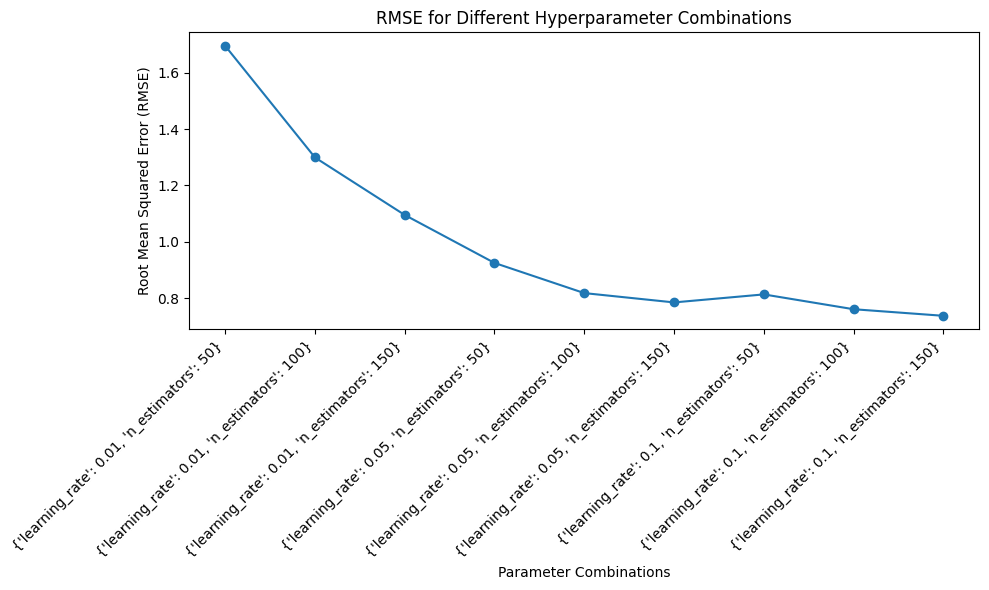

In [103]:
# Plot the RMSE for each parameter combination
results = grid_search.cv_results_
mean_rmse = np.sqrt(-results['mean_test_score'])
param_combinations = [str(params) for params in results['params']]

plt.figure(figsize=(10, 6))
plt.plot(param_combinations, mean_rmse, marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Parameter Combinations")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("RMSE for Different Hyperparameter Combinations")
plt.tight_layout()
plt.show()


In [104]:
# Evaluate Model
y_pred = best_model.predict(X_test)
evaluate_model("LGBM_FS", y_test,y_pred)

Metrics for LGBM_FS:
RMSE: 0.7034
MAE: 0.5363
R2: 0.9176

Test Results:
Test RMSE: 0.7034
Test MAE: 0.5363
Test R²: 0.9176


# Comparison

Lastly, after going through exploration, cleaning, feature engineering and training multiple models to their peak performance, we can make justifiable comparison between each of their performances and which yielded the best results

In [109]:
# Legend that explains the meaning of a model name based on their prefix and suffix
legend_dict = {
        'RF': 'Random Forest',
        'LR': 'Linear Regression',
        'LGBM': 'LightGBM',
        'WHP': 'Without Feature Selection and Hyperparameters',
        'WFS': 'Without Feature Selection, With Hyperparameters',
        '_FS': 'With Feature Selection and Hyperparameters'
    }

metrics = ['rmse', 'mae', 'r2']

In [110]:
# Plot the bar chart
def plot_metrics_comparison(models_list, metric_name, title):
    values = [models[model][metric_name] for model in models_list]
    plt.figure(figsize=(10, 6))
    plt.barh(models_list, values, color='skyblue')
    plt.xlabel(metric_name.capitalize())
    plt.title(title)
    plt.show()

In [111]:
# Plot comparison between models ending with 'WHP', 'WFS', 'FS' and starting with 'RF', 'LR', 'LGBM'

def plot_selected_models_comparison(location=None, comparison=None, title='All Models'):
    models_selected = list(models.keys())

    if location == 'ending':
        models_selected = [model for model in models.keys() if model.endswith(comparison)]
        title = f"Models ({legend_dict[comparison]})"

    elif location == "starting":
        models_selected = [model for model in models.keys() if model.startswith(comparison)]
        title = f"Models {legend_dict[comparison]}"

    for metric in metrics:
        plot_metrics_comparison(models_selected, metric, f'Comparison of {metric.capitalize()} for {title}')

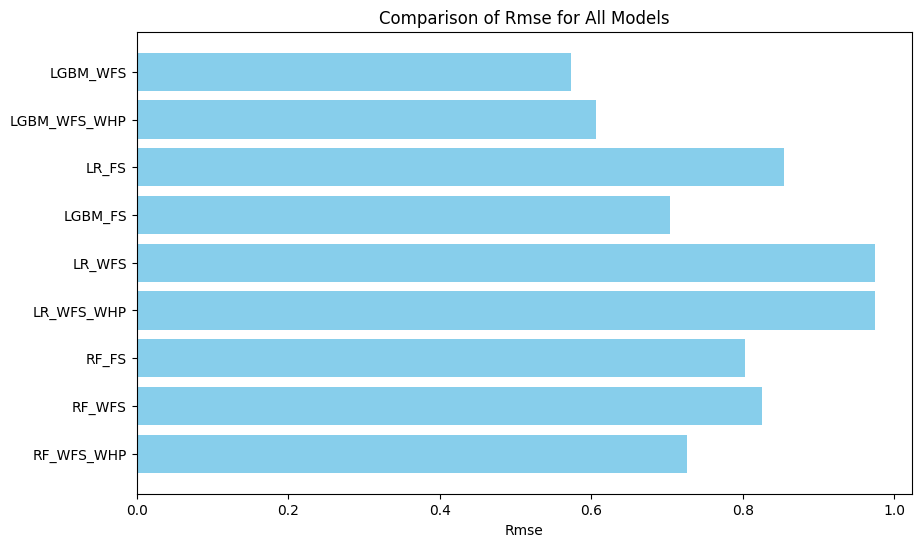

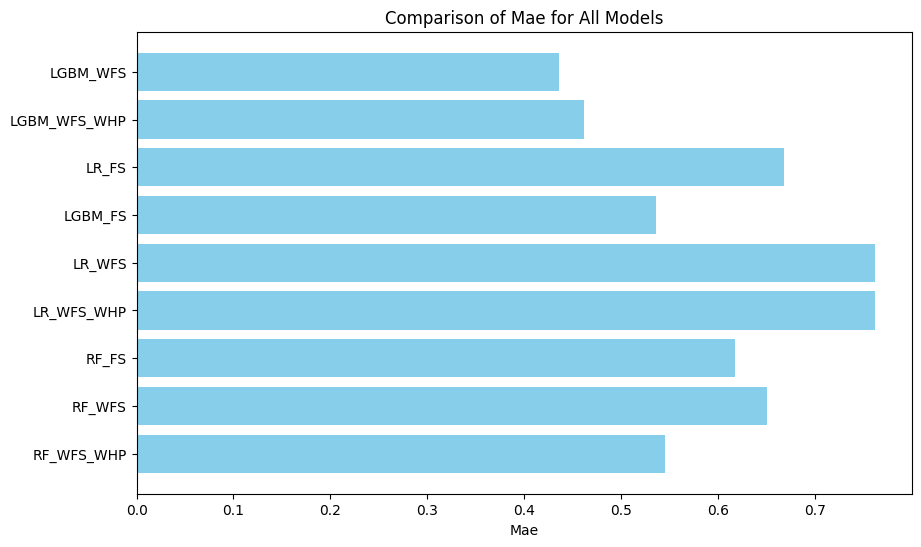

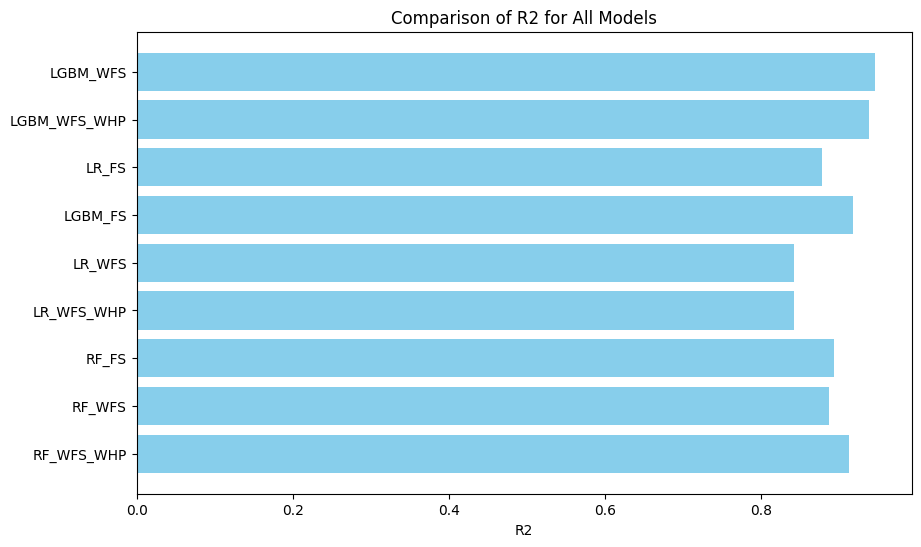

In [112]:
# Compare all models based on 'rmse', 'mae', and 'r2'
plot_selected_models_comparison()

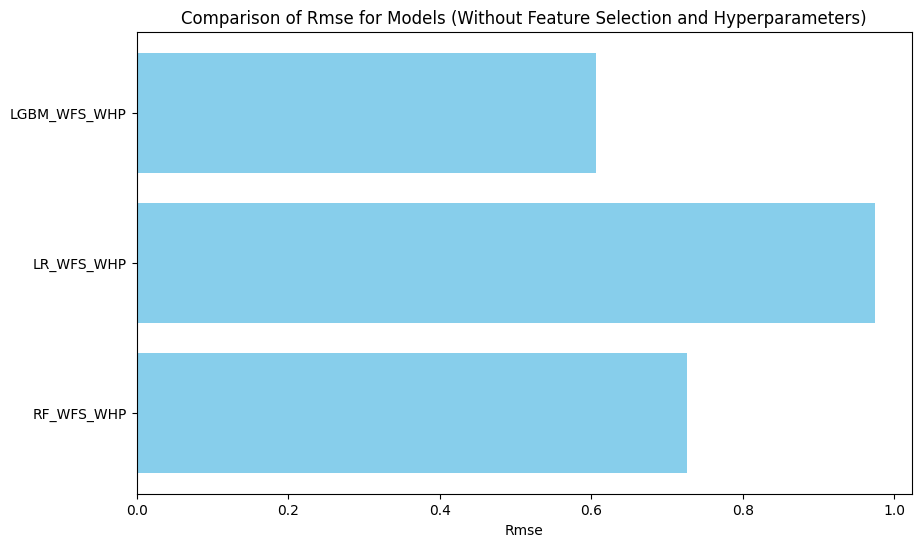

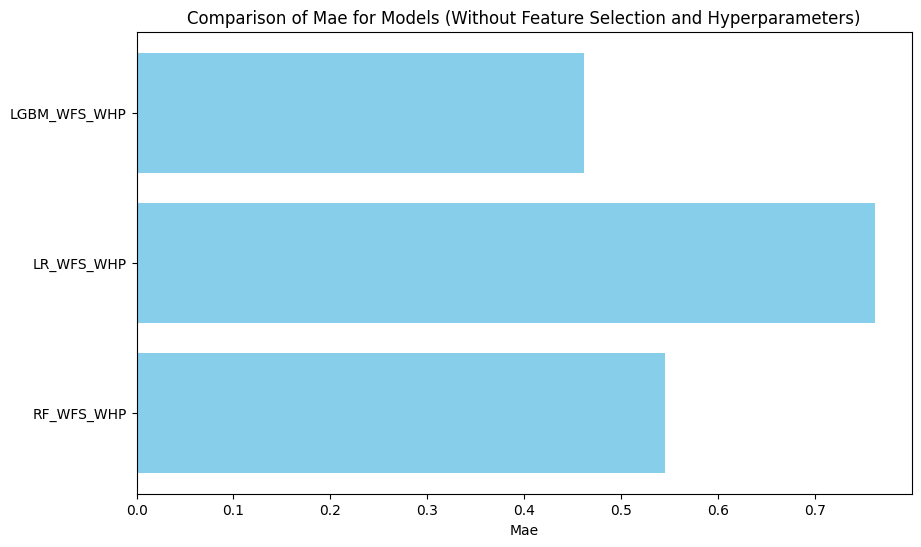

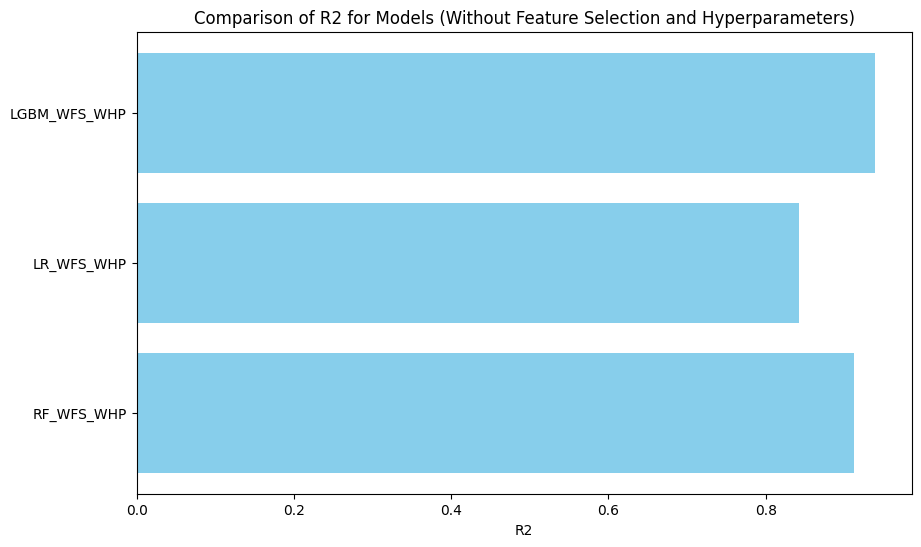

In [113]:
# Compare models without feature selection and hyperparameters based on 'rmse', 'mae', and 'r2'
plot_selected_models_comparison('ending','WHP')

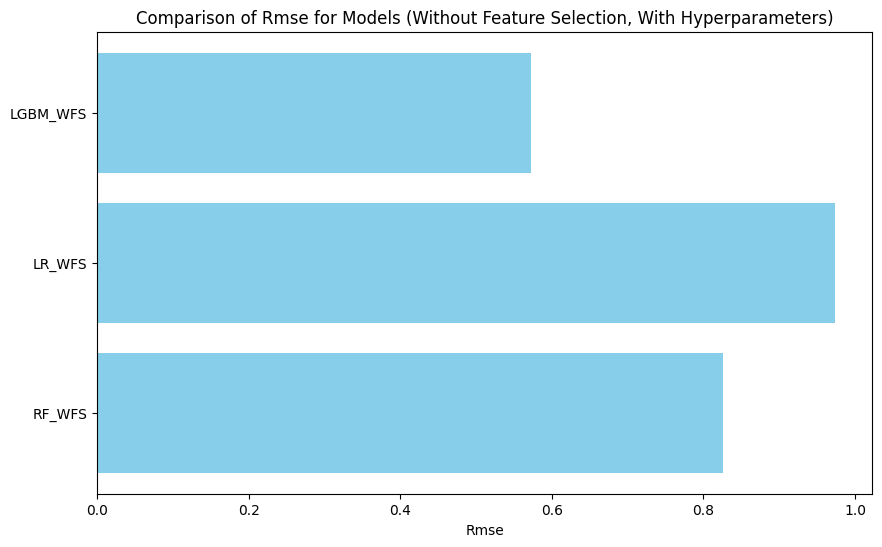

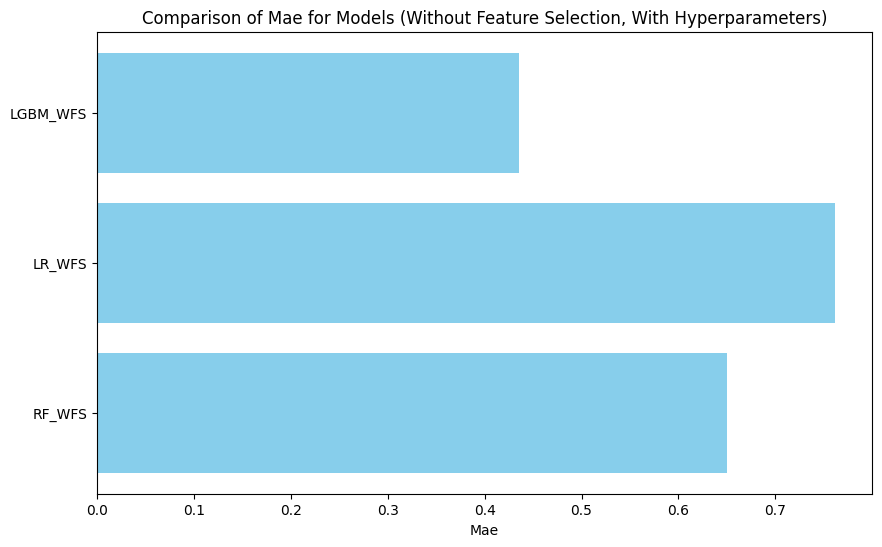

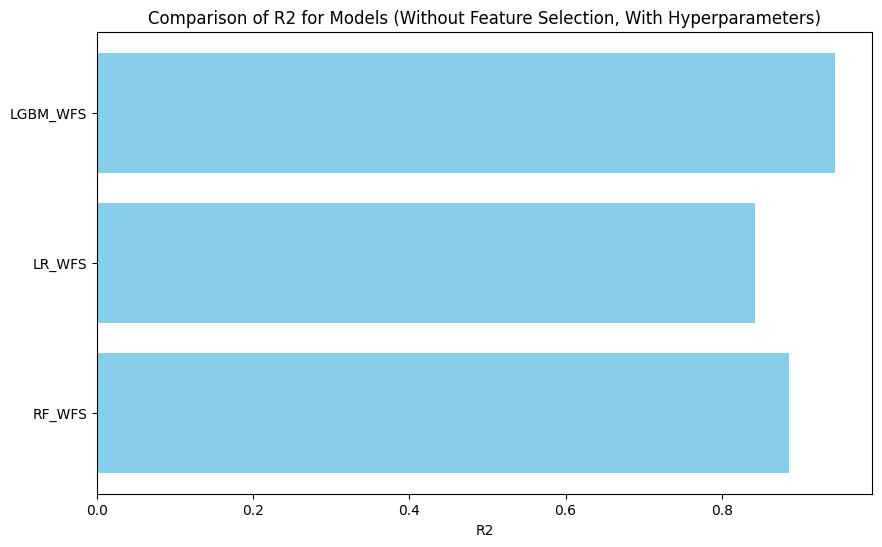

In [114]:
# Compare models without feature selection but with hyperparameters based on 'rmse', 'mae', and 'r2'
plot_selected_models_comparison('ending','WFS')

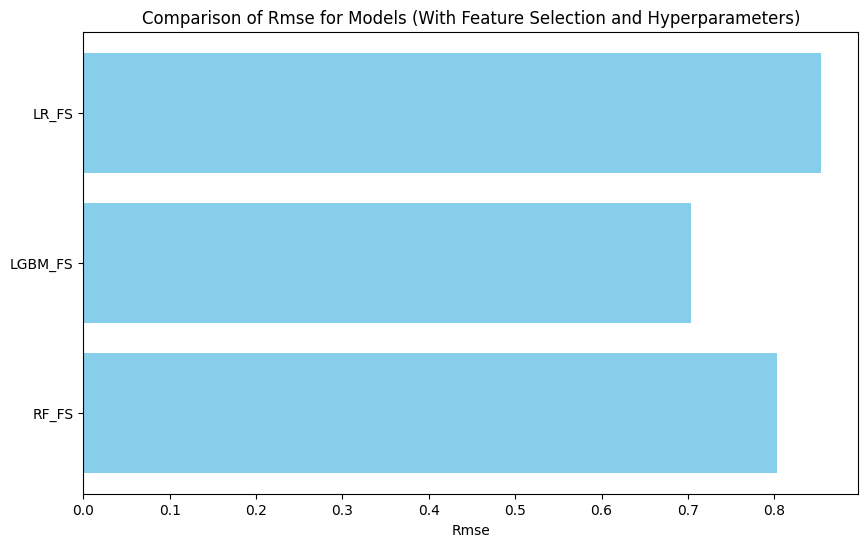

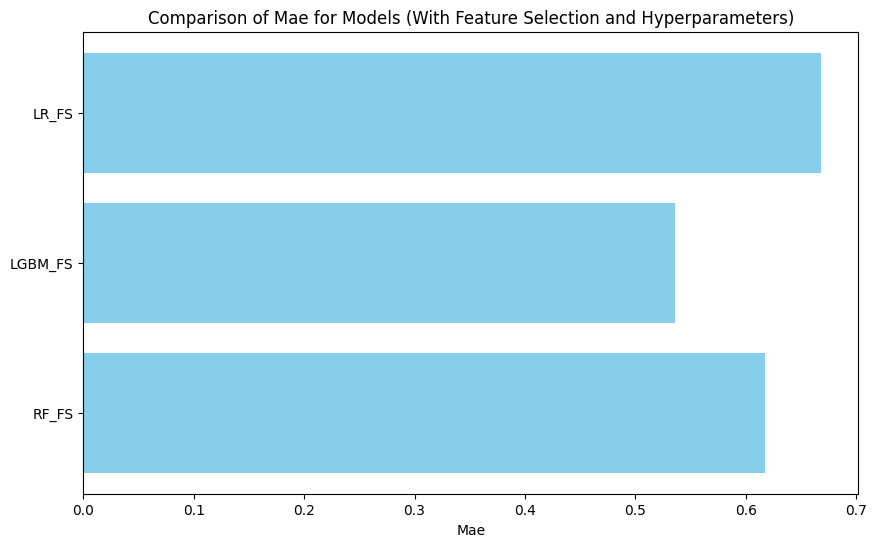

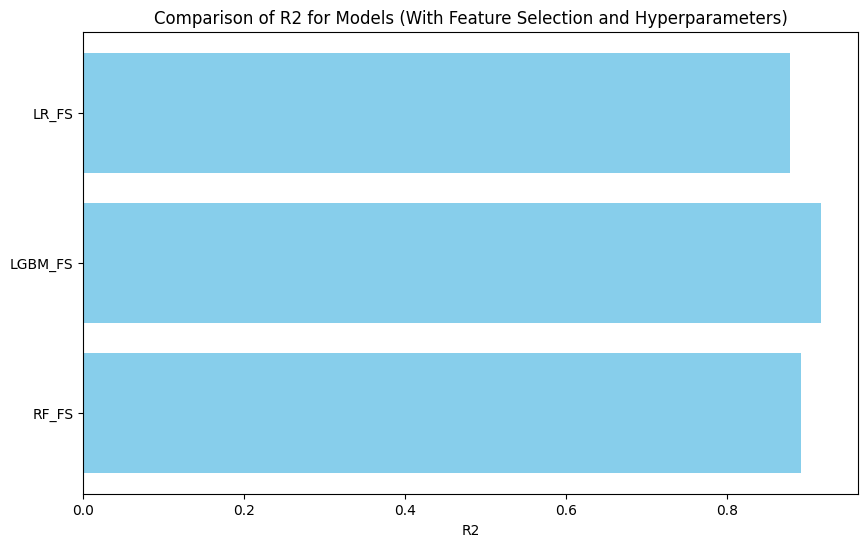

In [115]:
# Compare models with feature selection band with hyperparameters based on 'rmse', 'mae', and 'r2'
plot_selected_models_comparison('ending','_FS')

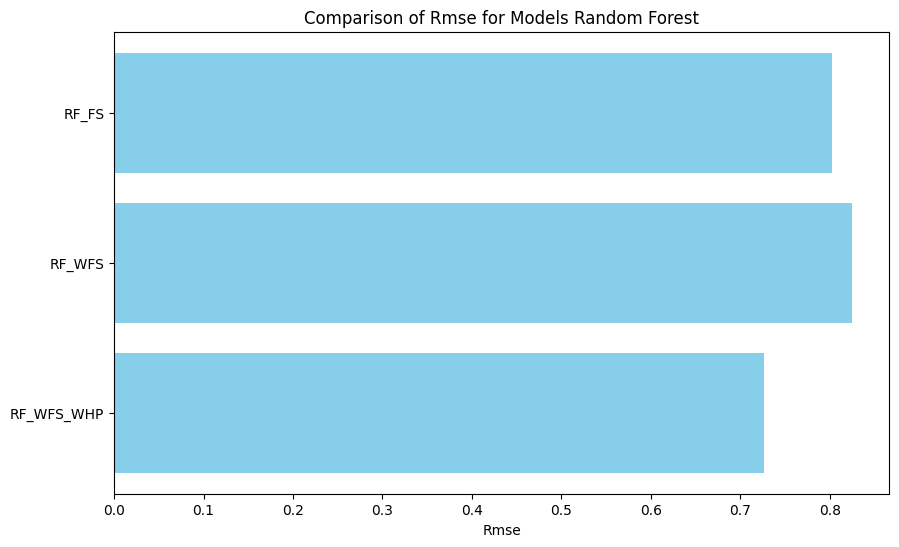

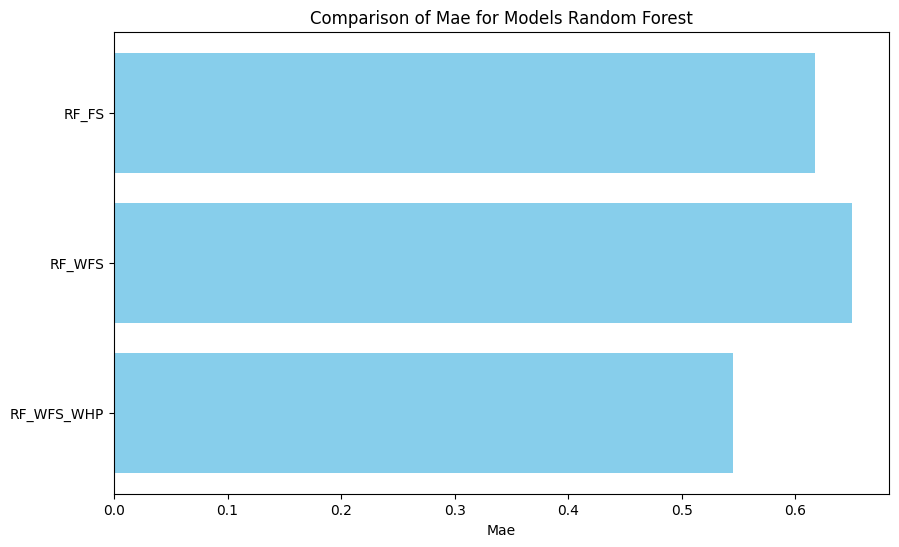

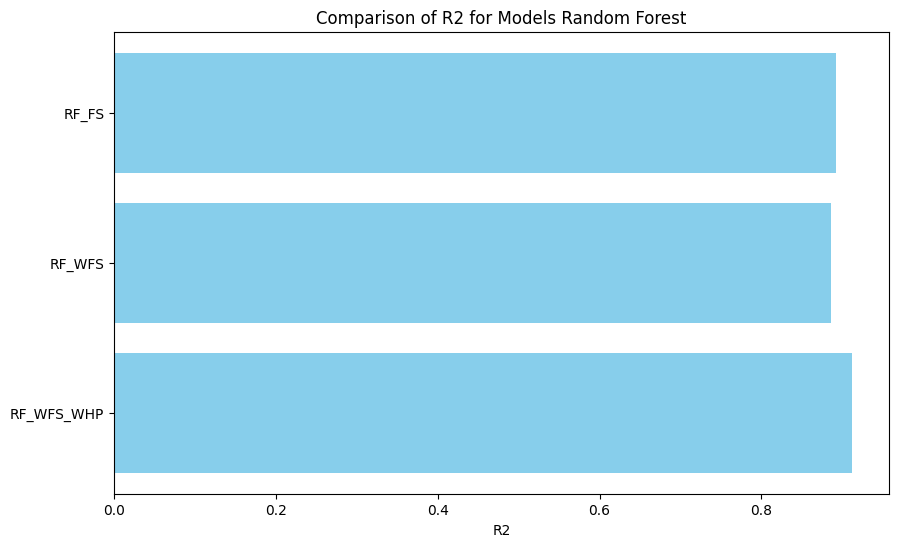

In [116]:
# Compare all different Random Forest models based on 'rmse', 'mae', and 'r2'
plot_selected_models_comparison('starting','RF')

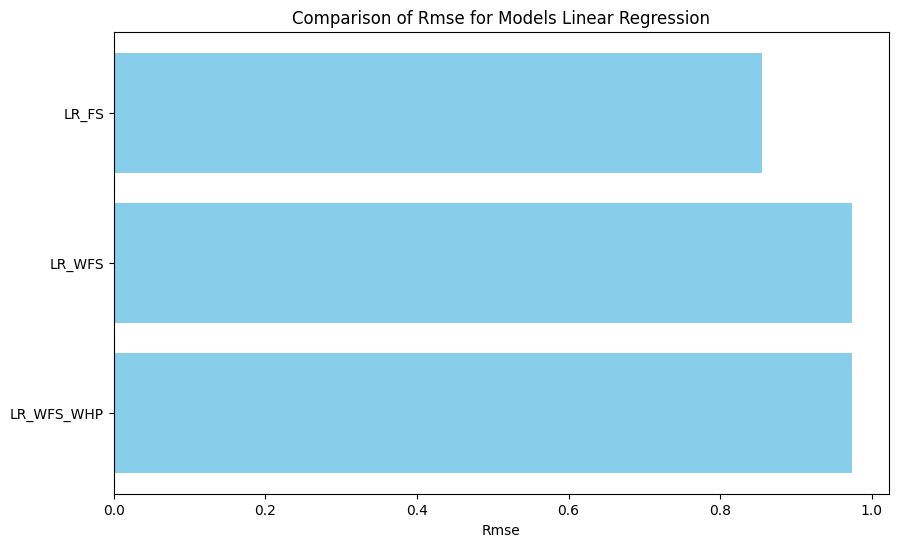

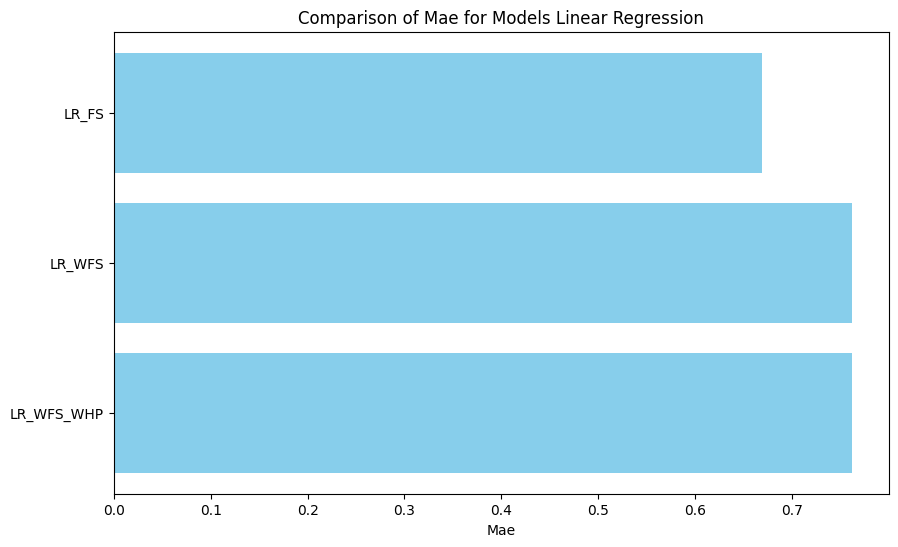

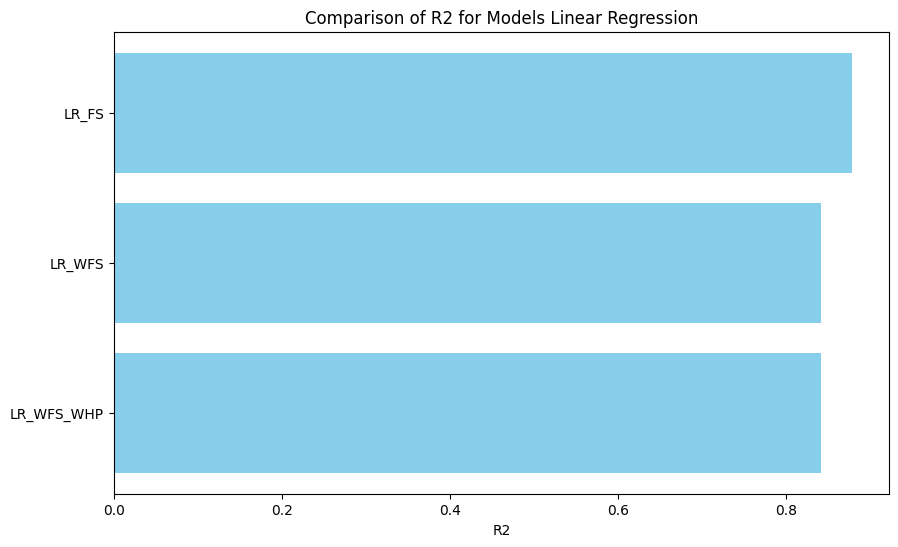

In [117]:
# Compare all different Linear Regression models based on 'rmse', 'mae', and 'r2'
plot_selected_models_comparison('starting','LR')

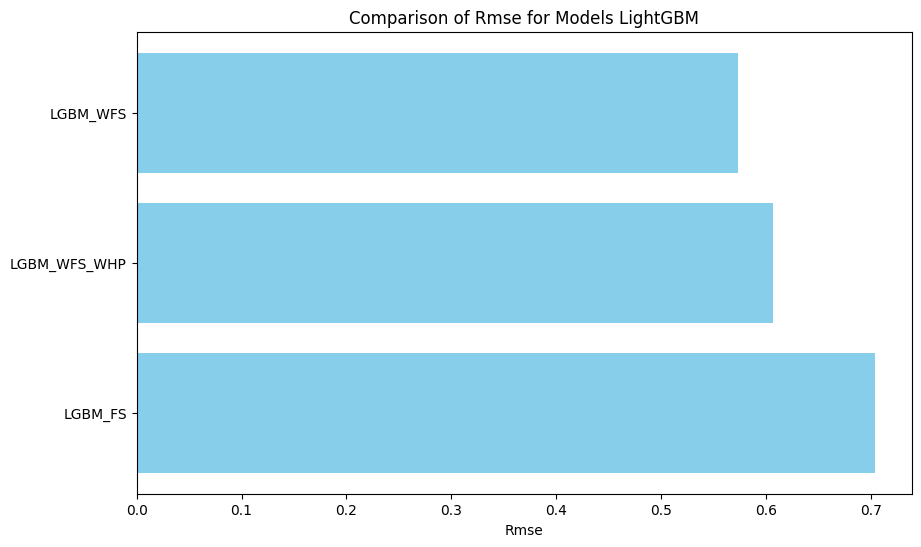

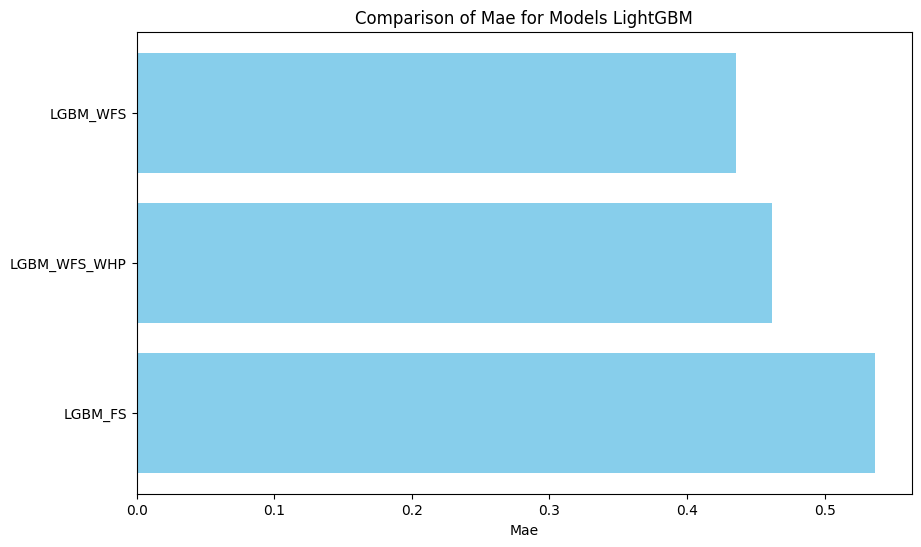

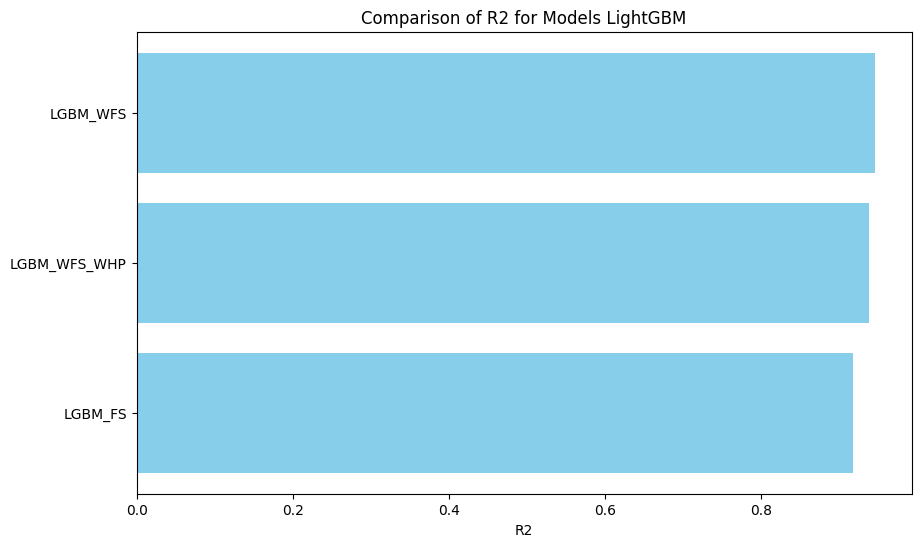

In [118]:
# Compare all different LightGBM models based on 'rmse', 'mae', and 'r2'
plot_selected_models_comparison('starting','LGBM')